In [126]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")



# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [127]:
#load data
df = pd.read_csv('Dataset_CP.csv')

### Assess The File and Exploring it to gain Understandings

In [128]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [129]:
df.shape[0]

2240

In [130]:
df.groupby("Education").describe().index

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Education')

In [131]:
df.groupby("Marital_Status").describe().index

Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Marital_Status')

In [132]:
#Check for duplicates
dataf_dup = df[df.duplicated()]
print("you have {} duplicate rows".format(len(dataf_dup)))

you have 0 duplicate rows


In [133]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
   

In [134]:
basic_info(df)

This dataset has  28  columns and  2240  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232  

## Data Cleaning

In [135]:
df_clean = df.copy()

##### There is a space in front of the income's column name

In [136]:
df_clean.rename(columns={' Income ':'Income'}, inplace=True)

#####  There are dollar signs, spaces, commas, and dots is the values of Income column

In [137]:
df_clean.Income = df_clean.Income.str.strip('$')
df_clean.Income = df_clean.Income.str.replace(".", "")
df_clean.Income = df_clean.Income.str.replace(",", "")
df_clean.Income = df_clean.Income.str.replace("00 ", "")

In [138]:
df_clean['Income'].head()

0    84835
1    57091
2    67267
3    32474
4    21474
Name: Income, dtype: object

In [139]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

<AxesSubplot:>

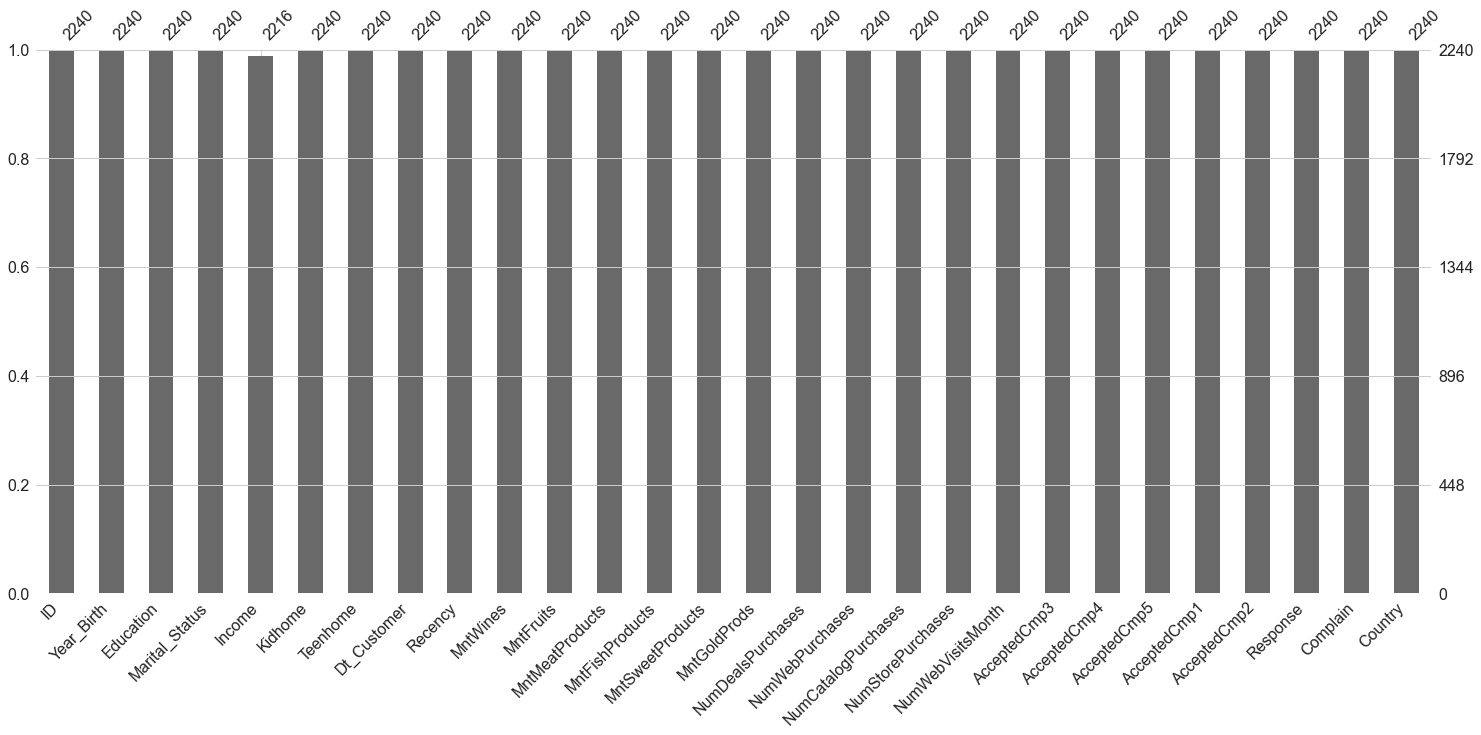

In [140]:
#pip install missingno
import missingno as msno
# Visualize missing data

msno.bar(df_clean)

<AxesSubplot:>

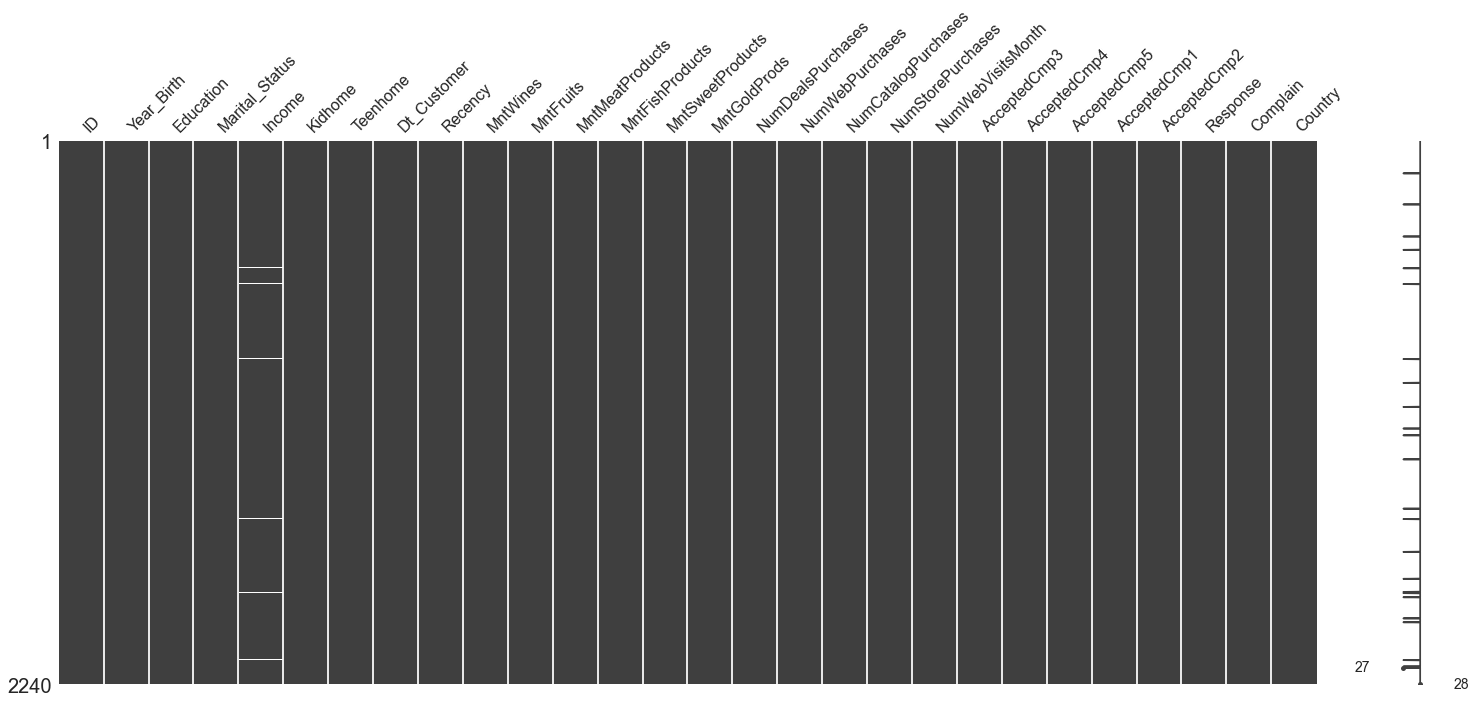

In [141]:
# Visualize missing data
msno.matrix(df_clean)

#####  The "Income" column has 23 missing values and its data type is string 

In [142]:
# divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_clean[df_clean.Income.isnull()==False]
missing_income = df_clean[df_clean.Income.isnull()==True]
# Convert the one that has income to int type
have_income.Income = have_income.Income.astype(int)

# give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype(int)

#combine the data
df_clean = missing_income.append(have_income)

##### Dt_Customer's type is string

In [143]:
df_clean.Dt_Customer = pd.to_datetime(df_clean.Dt_Customer)

In [144]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 134 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n




### Data Transforming to be done 

##### Marital Status Columns have unnecessary values 
##### Education Column's values is transform to Post Graduate, Graduate, Under Graduate for simplicity
##### Creating Age Column from YEAR_BIRTH

In [145]:
empty_indicators = df_clean.isnull() ## boolean indicators
empty_indices = empty_indicators.any(axis=1)
empty_rows = df_clean[empty_indices]
empty_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


### Final step of Wrangling: Store data 

In [146]:
# store the file
df_clean.reset_index(drop=True)
df_clean.to_csv('clean_df.csv', index=False)

In [147]:
#load data
df = pd.read_csv('clean_df.csv')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [149]:
# Getting numberic features/data in the dataset


numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [150]:
# Getting categorical features/data in the data set

categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Education', 'Marital_Status', 'Dt_Customer', 'Country'], dtype='object')

In [151]:
# Descibing the two random columns of the dataset

df[["Income","NumDealsPurchases"]].describe()

,Income,NumDealsPurchases
count,2240.000000,2240.000000
mean,52257.601339,2.325000
std,25036.600072,1.932238
min,1730.000000,0.000000
25%,35616.750000,1.000000
50%,51400.000000,2.000000
75%,68289.750000,3.000000
max,666666.000000,15.000000


###  Are there any null values or outliers? 
 Income has 23 null values, and I used the median number to fill in as shown above .
 
 ###### There are many columns having outliers, but most of them seem like natural outliers came from population, whereas the outliers in Year_birth seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, I will remove the outliers in Year_birth.

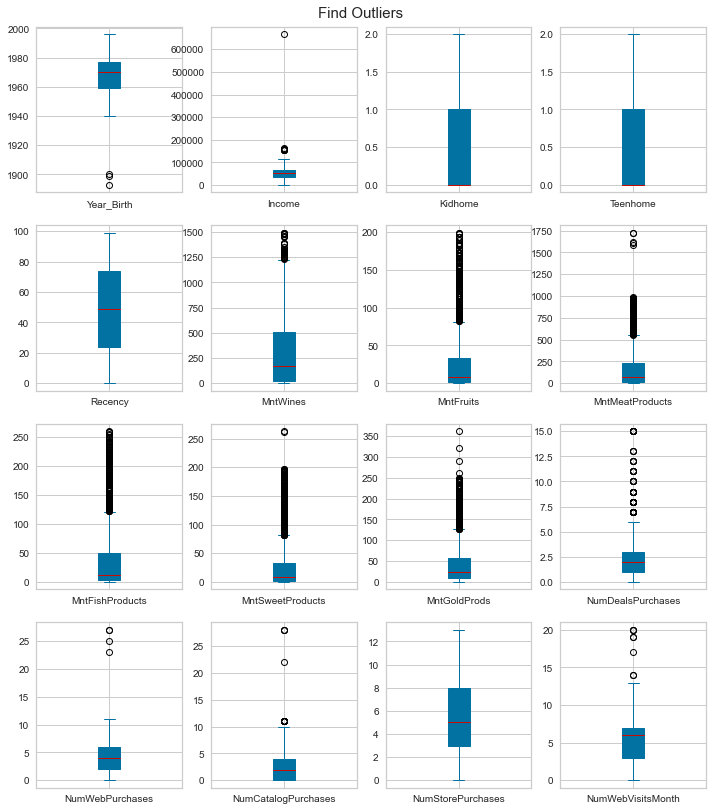

In [152]:
# See if there is any outliers

# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [153]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

###  Remove outliers in year_birth

In [154]:
# Remove outliers in year_birth
df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

<!-- ### ection 1-2: Are there any useful variables that you can engineer with the given data?
    Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
    Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
    Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
    Minorhome: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
    Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
    Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
    Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column
    "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase -->

#### Changing Datatype of Dt_Customer to DateTime 

In [155]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [156]:

df['Total_Mnt'] = df.MntWines+ df.MntFruits+ df.MntMeatProducts+ df.MntFishProducts+ df.MntSweetProducts+ df.MntGoldProds 
df['Total_num_purchase'] = df.NumDealsPurchases+ df.NumWebPurchases+ df.NumCatalogPurchases+ df.NumStorePurchases
# new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
df['AOV'] = df.Total_Mnt/df.Total_num_purchase

#### Creating Age Column from YEAR_BIRTH

In [157]:
df['Age'] = 2023 - df['Year_Birth']

#### Creating Column for Total Compaigns Accepted by Customer

In [158]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum(axis=1)

#### Education Column's values is transform to Post Graduate, Graduate, Under Graduate for simplicity

In [159]:
df_m=df.copy()

In [160]:
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Year_Birth                2237 non-null   int64         
 2   Education                 2237 non-null   object        
 3   Marital_Status            2237 non-null   object        
 4   Income                    2237 non-null   int64         
 5   Kidhome                   2237 non-null   int64         
 6   Teenhome                  2237 non-null   int64         
 7   Dt_Customer               2237 non-null   datetime64[ns]
 8   Recency                   2237 non-null   int64         
 9   MntWines                  2237 non-null   int64         
 10  MntFruits                 2237 non-null   int64         
 11  MntMeatProducts           2237 non-null   int64         
 12  MntFishProducts     

#### Marital Status Columns have unnecessary values

In [162]:
booleanIndex = (df["Marital_Status"] == "Absurd") | \
(df["Marital_Status"] == "Alone") | (df["Marital_Status"] == "YOLO") ## Vectorization
df.loc[booleanIndex, ["Marital_Status"]] = "Single"
df["Marital_Status"].unique()

array(['Married', 'Together', 'Single', 'Widow', 'Divorced'], dtype=object)


# Exploratory Data Analysis


### Lets look at the distribution of our  variables to see what we can discover

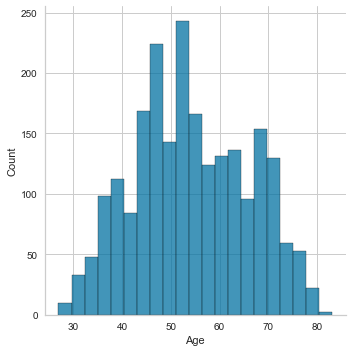

In [163]:
import seaborn as sns
sns.displot(df, x="Age")

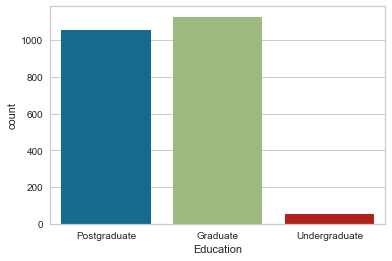

In [164]:
sns.countplot(x="Education", data=df)
plt.show()

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

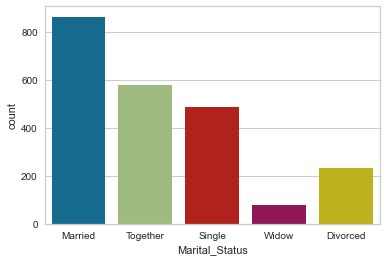

In [165]:
sns.countplot(x="Marital_Status", data=df)

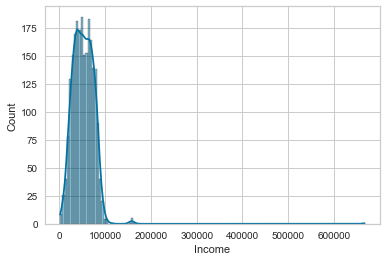

In [166]:
sns.histplot(data=df, x='Income', kde=True)
plt.show()

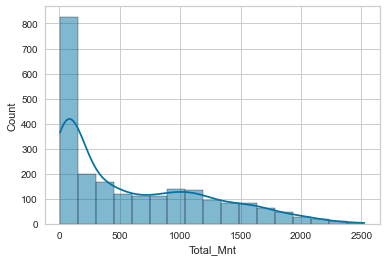

In [167]:
sns.histplot(data=df, x='Total_Mnt', kde=True)
plt.show()

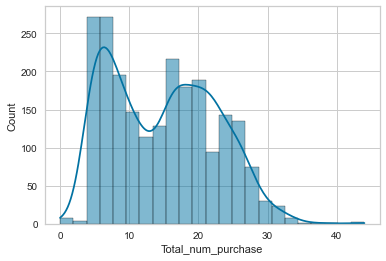

In [168]:
sns.histplot(data=df, x='Total_num_purchase', kde=True)
plt.show()

### Lets create a categorical age group feature for data simplification

In [169]:
# define the age groups
age_groups = [(23, 30), (31, 38), (39, 46), (47, 54), (55, 62), (63, 70), (71, 78), (79, 83)]


# create a function to assign age group based on age
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]}-{age_range[1]}"
    return "Unknown"

# apply the function to create a new column for age group
df['age_group'] = df['Age'].apply(assign_age_group)

#keep the data ordered for better visualization
age_order = ['23-30', '31-38', '39-46', '47-54', '55-62', '63-70', '71-78', '79-81']

In [170]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_num_purchase,AOV,Age,Total_Campaigns_Accepted,age_group
0,8996,1957,Postgraduate,Married,51400,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,603,29,20.793103,66,0,63-70
1,1994,1983,Graduate,Married,51400,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,19,4,4.750000,40,0,39-46
2,3769,1972,Postgraduate,Together,51400,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,5,8.400000,51,0,47-54
3,5255,1986,Graduate,Single,51400,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,637,27,23.592593,37,0,31-38
4,8268,1961,Postgraduate,Married,51400,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,404,17,23.764706,62,0,55-62


# Customer Profiling
### c1. Demographics: Age, Education, Marital Status, Income

### What is the maximum number of Customers by Age Group

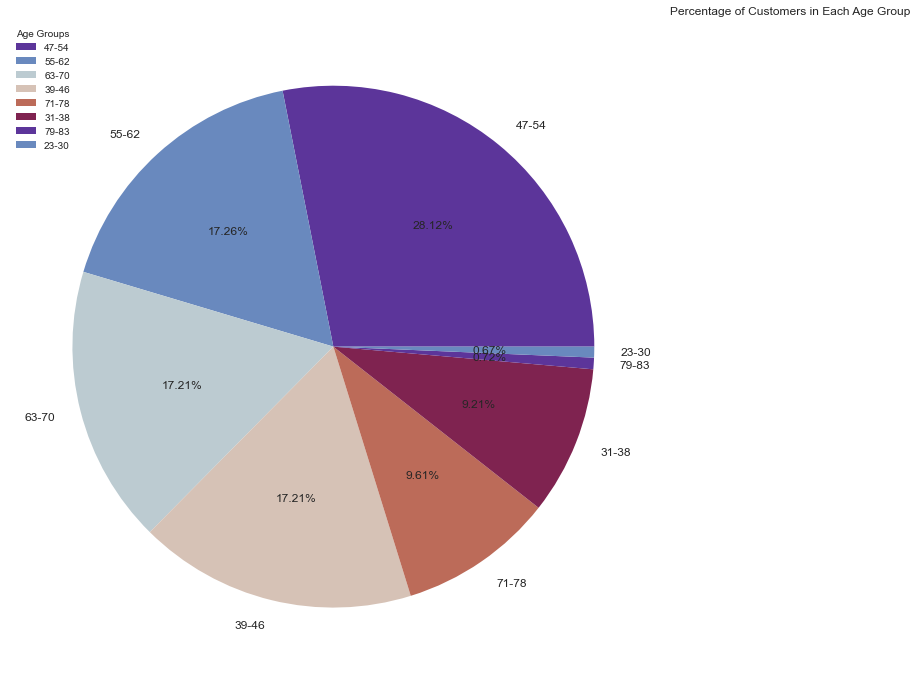

In [171]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define age groups and their counts
data = df['age_group'].value_counts()

# Define colors for the slices
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots(figsize=(12, 12))


# Create the pie chart

palette = sns.color_palette('twilight_shifted')
wedges, texts, autotexts = ax.pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
ax.set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)
    
# Add title and legend
plt.title('Percentage of Customers in Each Age Group')
plt.legend(title='Age Groups', loc='best')

# Show the plot
plt.show()


#### It Can be seen from the Graph that more that 60 % of our customers are of age (47 to 70) 

Let's have a look on the customer's education :


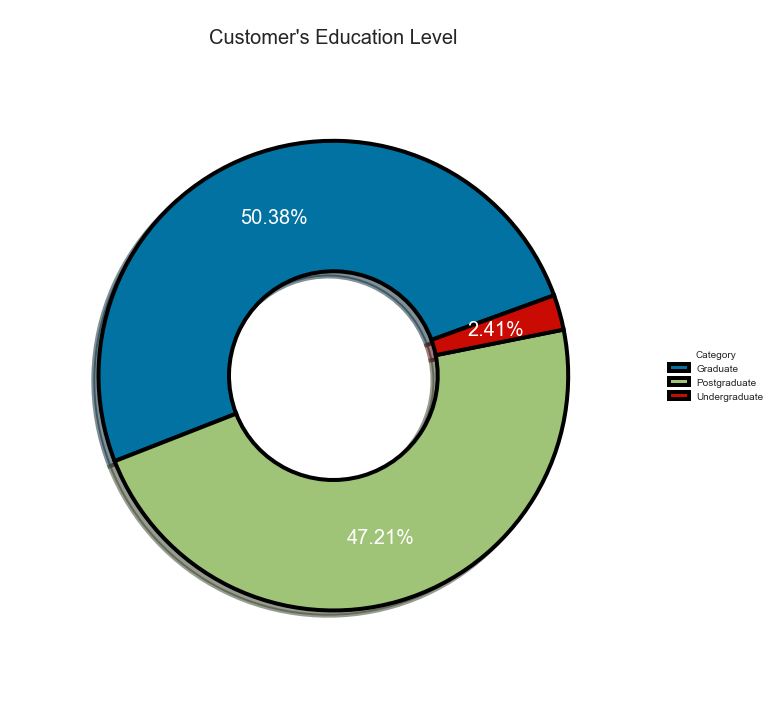

In [172]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9,  
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

#### It can be seen from the graph that majority customers are of Post-Graduate or Gradute Education Level

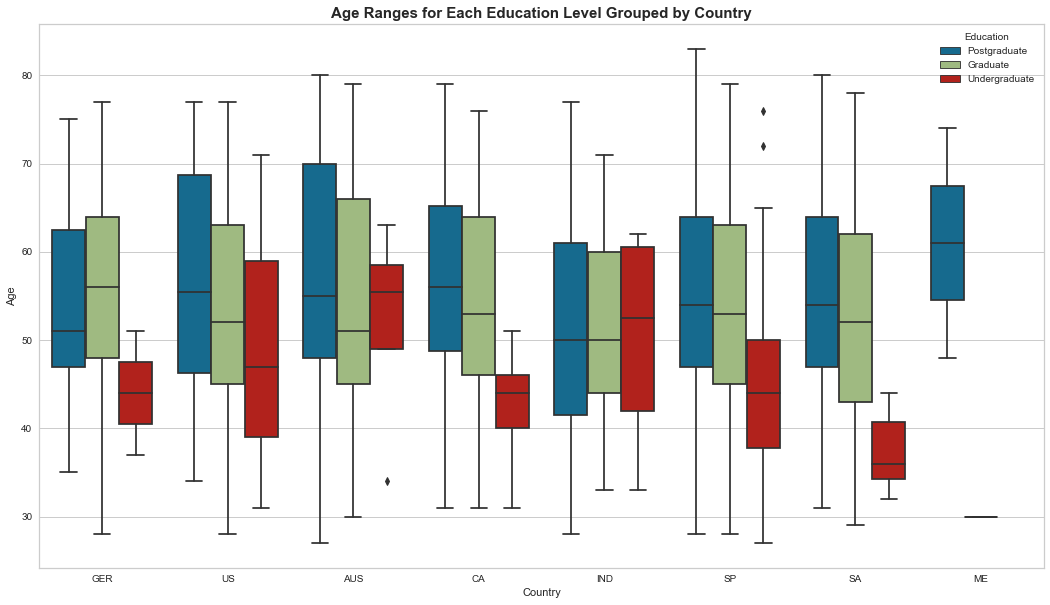

In [173]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Age', hue='Education',data=df)
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

Age range of Post-Graduate Student is maximum in all country except GERMANY and there is only Post-Graduates in ME who buy products or accept compaigns 

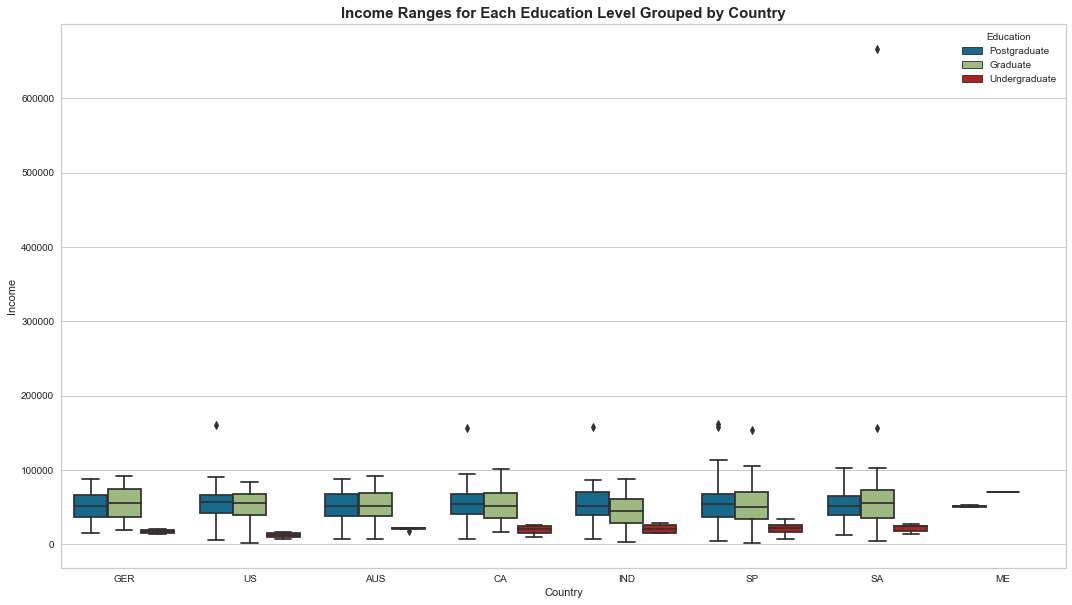

In [174]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Income', hue='Education',data=df)
plt.title("Income Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

### Total Amount Spent By Marital Status 

In [175]:
import plotly.express as px

df_plot = df.groupby(['Marital_Status'])['Total_Mnt'].mean().reset_index()

fig4 = px.bar(df_plot, x='Marital_Status', y='Total_Mnt', color='Marital_Status')

fig4.show()

### Total Amount Spent By Age Group

In [176]:
import plotly.express as px

df_plot = df.groupby(['age_group'])['Total_Mnt'].mean().reset_index()

fig4 = px.bar(df_plot, x='age_group', y='Total_Mnt', color='age_group')

fig4.show()

## Summary of Demographic Segmentation
### According to the data visualization, the majority of consumers are married, between the ages of 40 and 60, and hold graduate degrees. The age range of 47 to 70 accounts for about 60% of customers. Graduates and postgraduates make up roughly 98% of the customers who buy products from the organization, a sizeable share of the total customer base. Only postgraduates in the Middle East participate in the company's campaigns, and all other nations other than Germany have the biggest age range of postgraduate clients. The analysis also reveals that consumers over 75 spend the most money on goods probably as a result of their higher disposable income, stability in their finances, and desire for quality and convenience.
With the use of these information, our business may develop marketing strategies that target married, middle-aged, and highly educated consumers while emphasising quality and convenience to attract older, higher-spending consumers.


### Psychographics:
#### Identify buying habits (e.g., total number of purchases, average order value, preferred products)

#### Amount spend by customers on different products

In [177]:
# calculate total amount spent on each product category
total_wines = df['MntWines'].sum()
total_fruits = df['MntFruits'].sum()
total_meat = df['MntMeatProducts'].sum()
total_fish = df['MntFishProducts'].sum()
total_sweets = df['MntSweetProducts'].sum()
total_gold = df['MntGoldProds'].sum()

# print the results
print("Total amount spent on wines: $", total_wines)
print("Total amount spent on fruits: $", total_fruits)
print("Total amount spent on meat: $", total_meat)
print("Total amount spent on fish: $", total_fish)
print("Total amount spent on sweets: $", total_sweets)
print("Total amount spent on gold products: $", total_gold)

Total amount spent on wines: $ 680038
Total amount spent on fruits: $ 58767
Total amount spent on meat: $ 373393
Total amount spent on fish: $ 83939
Total amount spent on sweets: $ 60553
Total amount spent on gold products: $ 98358


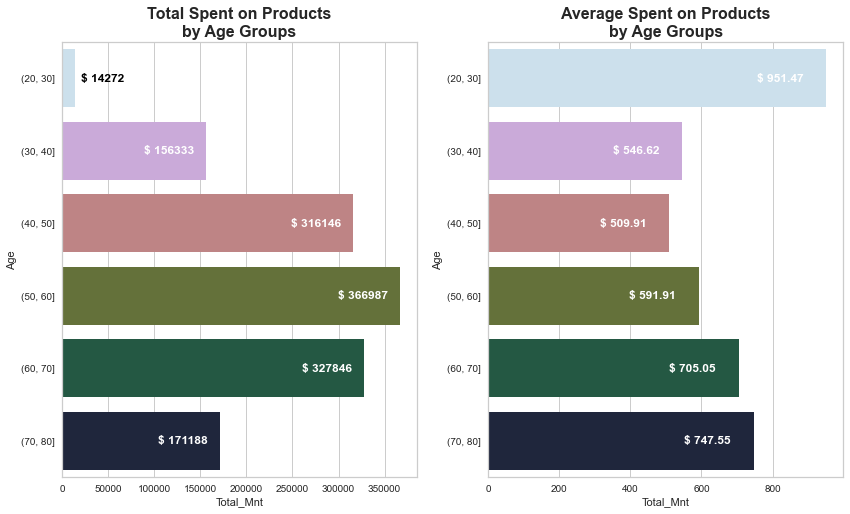

In [178]:
group = pd.cut(df['Age'], [20, 30, 40, 50, 60, 70, 80])
group.value_counts()
df2 = df.copy()
df2['Age'] = group

sum_group = df2[['Total_Mnt', 'Age']].groupby('Age').sum()
mean_group = df2[['Total_Mnt', 'Age']].groupby('Age').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sns.barplot(x=sum_group['Total_Mnt'], y=sum_group.index, palette='cubehelix_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Total_Mnt']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

sns.barplot(x=mean_group['Total_Mnt'], y=mean_group.index, palette='cubehelix_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Mnt']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

Text(0.5, 1.0, 'Gold')

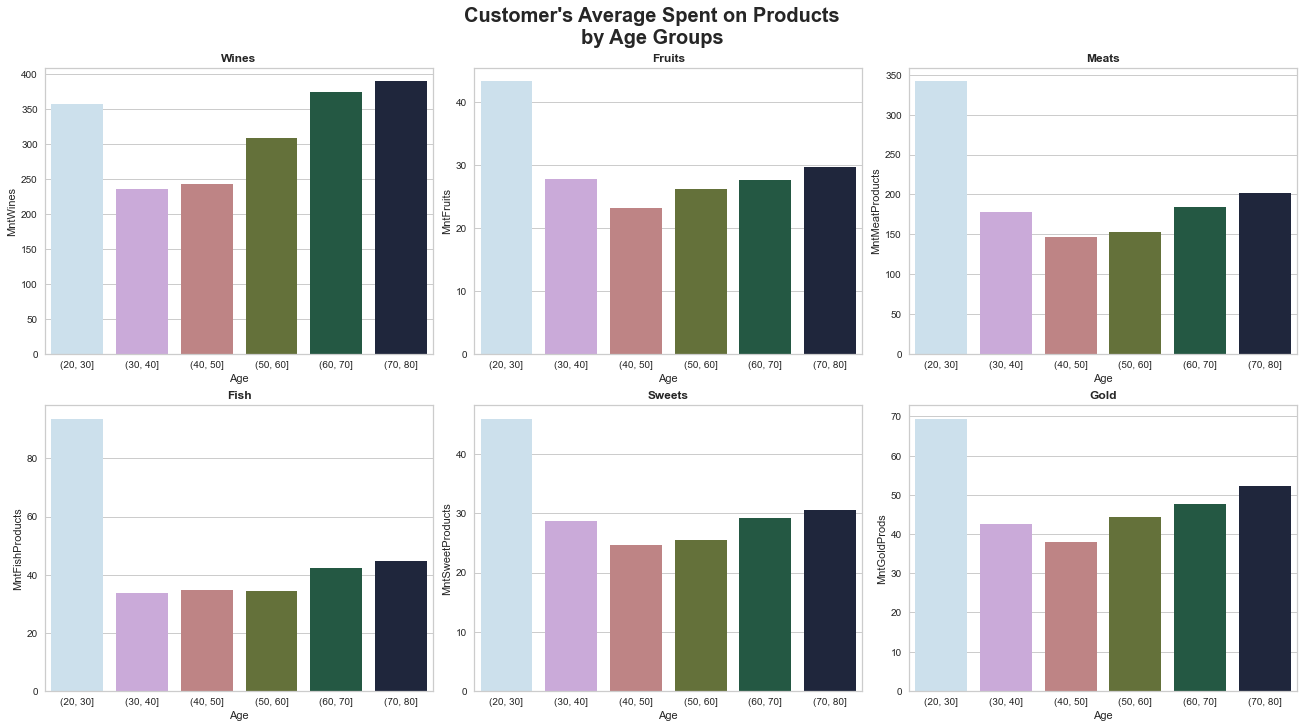

In [179]:
fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5]], constrained_layout=True, figsize=(18,10))

fig.suptitle("Customer's Average Spent on Products\nby Age Groups", weight='bold', fontsize=20)

# Bar plot
sns.barplot(data=df, x=group, y='MntWines', palette='cubehelix_r', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x=group, y='MntFruits', palette='cubehelix_r', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x=group, y='MntMeatProducts', palette='cubehelix_r', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x=group, y='MntFishProducts', palette='cubehelix_r', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x=group, y='MntSweetProducts', palette='cubehelix_r', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x=group, y='MntGoldProds', palette='cubehelix_r', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')


(0.0, 1.0, 0.0, 1.0)

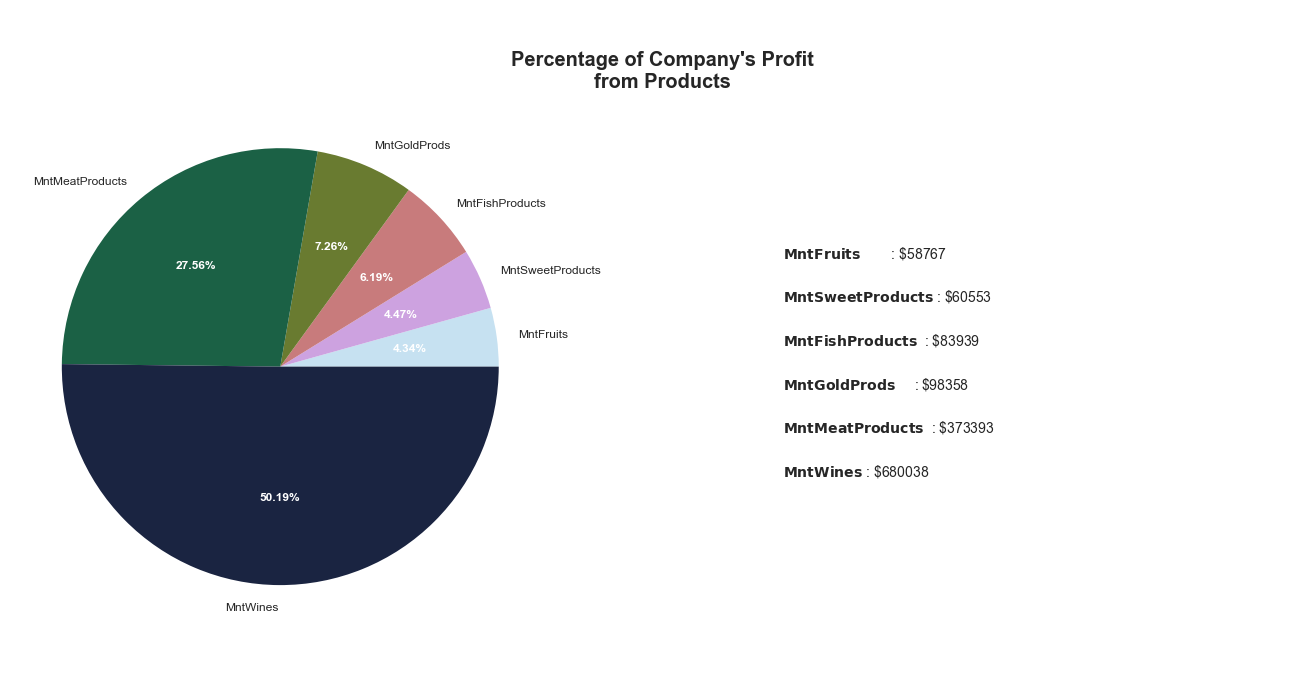

In [180]:
fig, axd = plt.subplot_mosaic([[6,6,7], [6,6,7], [6,6,7]], constrained_layout=True, figsize=(18,10))

# Pie chart
data = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values()

palette = sns.color_palette('cubehelix_r')
wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axd[7].axis('off')


(0.0, 1.0, 0.0, 1.0)

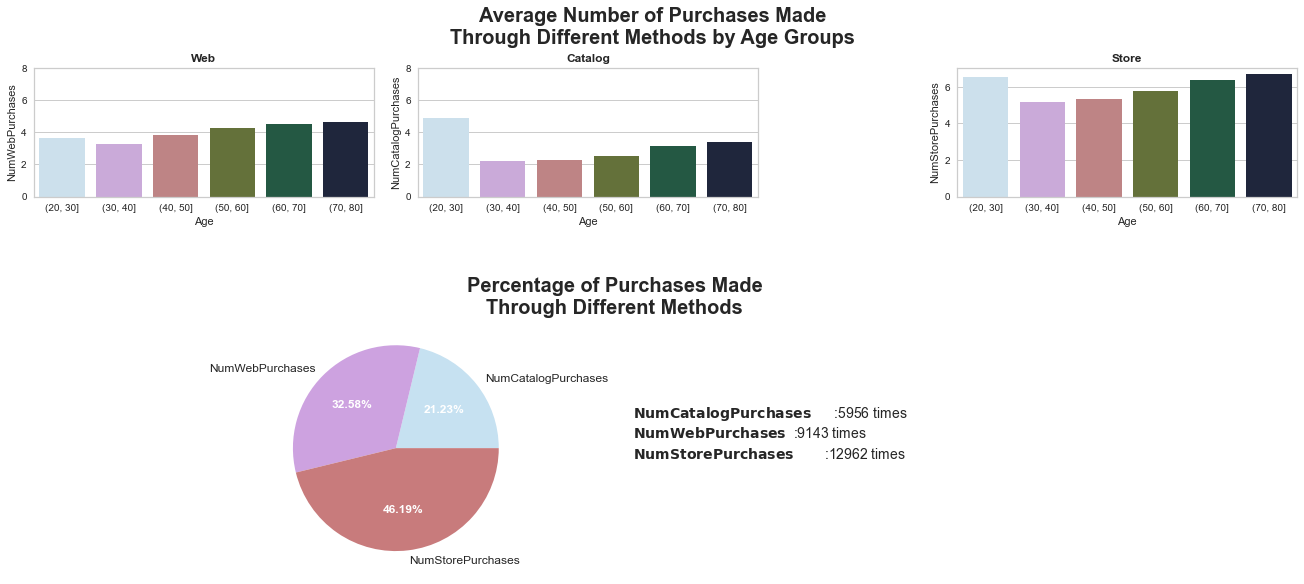

In [181]:
fig, axd = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axd[0], ylim=custom_ylim)
plt.setp(axd[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x=group, y='NumWebPurchases', palette='cubehelix_r', ci=None, ax=axd[0])
axd[0].set_title('Web', weight='bold')
sns.barplot(data=df, x=group, y='NumCatalogPurchases', palette='cubehelix_r', ci=None, ax=axd[1])
axd[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x=group, y='NumStorePurchases', palette='cubehelix_r', ci=None, ax=axd[2])
axd[2].set_title('Store', weight='bold')

# Pie chart
data = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values()

palette = sns.color_palette('cubehelix_r')
wedges, texts, autotexts = axd[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=20, x=1.35)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[3].text(2.3, 0.3-0.2*i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

axd[4].axis('off')


### Does Age has any relation with the sales of Wines, Food and Gold?

In [182]:
df['Ratio of wines'] = (df[['MntWines']].sum(axis=1)) / df['Total_Mnt']
df['Ratio of food'] = (df[['MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts']].sum(axis=1)) / df['Total_Mnt']
df['Ratio of gold'] = (df[['MntGoldProds']].sum(axis=1)) / df['Total_Mnt']


<AxesSubplot:xlabel='age_group', ylabel='Ratio of wines'>

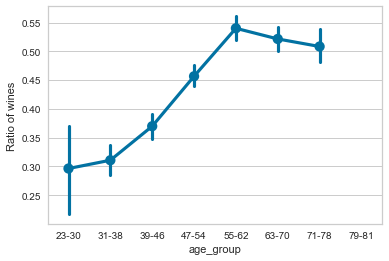

In [183]:

sns.pointplot(data=df, x="age_group", y="Ratio of wines", order = age_order)

<AxesSubplot:xlabel='age_group', ylabel='Ratio of food'>

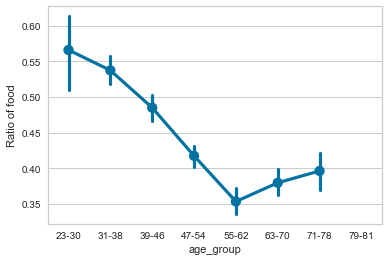

In [184]:
sns.pointplot(data=df, x="age_group", y="Ratio of food", order = age_order)

<AxesSubplot:xlabel='age_group', ylabel='Ratio of gold'>

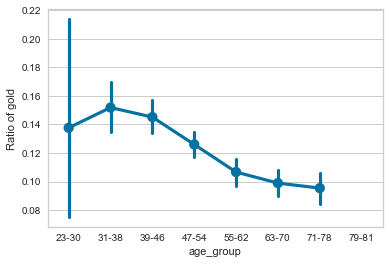

In [185]:
sns.pointplot(data=df, x="age_group", y="Ratio of gold", order = age_order)

#### The movements of the purchases of Wines over the total purchases seems to Increase with the Age and its mximum consumed by Customers with age group (50 -60 )
#### The movements of the purchases of food over the total purchases seem to do the opposite as the wine.It decreases with the age increases and its maximum xonsumption is at age group ( 23-30 )

#### The purchases of Gold also decreses with age increases

## Summary of Psychographic Segmentation

### The information demonstrates that younger and older people have different tastes and lifestyle choices. Due to concerns about their health, enjoyment, or social standing, young people frequently prioritise spending on items like fruits, fish, chocolates, gold, and meats. However older people with more sophisticated tastes frequently spend more on wine. For instance, a business that mostly sells wine might discover that older customers make up the majority of its purchases indicating the disparities in tastes between age groups. The proper demographic can be more effectively targeted with the help of this information, which can also increase overall sales.


### Behaviours


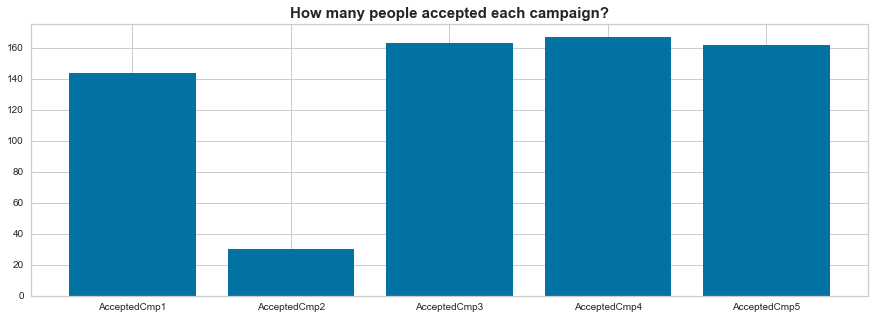

In [186]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
fig = plt.figure(figsize=(15,5))
plt.bar(x=campaign_cols,
        height=df[campaign_cols].sum())

plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

### Which is the Most Successful Compaigns Overall

In [187]:
# calculate the conversion rate for each campaign
for i in range(1, 6):
    campaign = 'AcceptedCmp' + str(i)
    conversion_rate = df[campaign].sum() / len(df)
    print(f"Conversion rate for {campaign}: {conversion_rate:.2%}")

# identify the campaign with the highest conversion rate
best_campaign = 'AcceptedCmp1'
best_conversion_rate =df[best_campaign].sum() / len(df)

for i in range(2, 6):
    campaign = 'AcceptedCmp' + str(i)
    conversion_rate = df[campaign].sum() / len(df)
    if conversion_rate > best_conversion_rate:
        best_campaign = campaign
        best_conversion_rate = conversion_rate

print(f"The best campaign is {best_campaign} with a conversion rate of {best_conversion_rate:.2%}")

Conversion rate for AcceptedCmp1: 6.44%
Conversion rate for AcceptedCmp2: 1.34%
Conversion rate for AcceptedCmp3: 7.29%
Conversion rate for AcceptedCmp4: 7.47%
Conversion rate for AcceptedCmp5: 7.24%
The best campaign is AcceptedCmp4 with a conversion rate of 7.47%


We are calculating conversion rate in the above code to determine the effectiveness of each marketing campaign. Conversion rate is the percentage of customers who responded positively to a campaign out of the total number of customers who were targeted. By calculating the conversion rate for each campaign, we can identify which campaigns were more successful at convincing customers to accept the offer, and which campaigns were less successful.

This information can be used to optimize future marketing campaigns by focusing on the campaigns that had the highest conversion rates and improving or discarding the campaigns with lower conversion rates.

We see that camapign2 might have some problems because it's very less accepted while other campaigns are accepted at a similar rate.

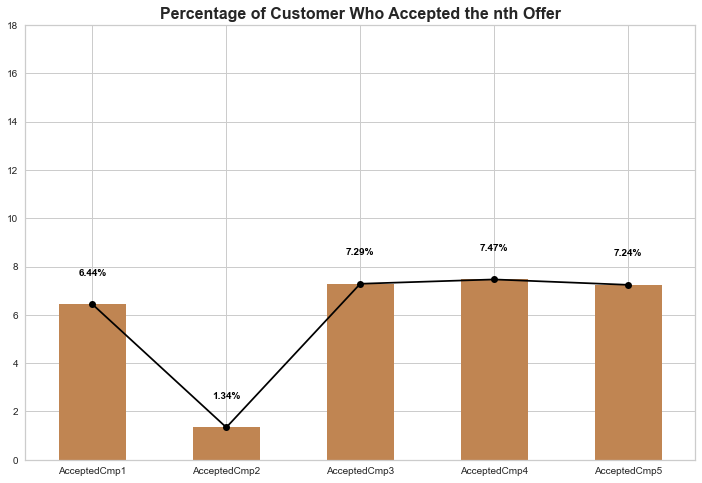

In [188]:
# fig, ax = plt.subplots(figsize=(10, 8))
# # sns.pointplot(data=df, x="age_group", y="Total_Campaigns_Accepted", order = age_order, ax=ax)
plt.figure(figsize=(12,8))
plt.title('Percentage of Customer Who Accepted the nth Offer', weight='bold', fontsize=16)

percent = df.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]*100/len(df)

ax = percent.plot.bar(color='#c08552')
percent.plot(style='o-', colormap='copper')

plt.setp(ax, ylim=(0, 18))

for i,v in enumerate(percent):
    plt.text(i, v+1.2, '{:.2f}%'.format(v), horizontalalignment='center', weight='bold', color='Black', fontsize=10)

### Which Compaign is most successful amoung each age group

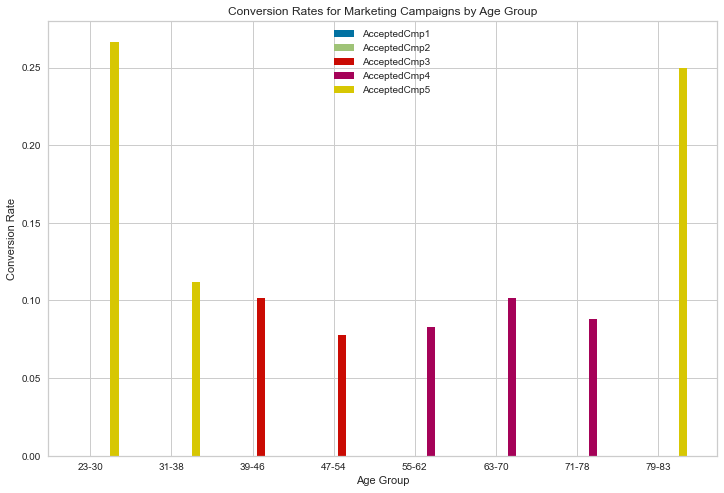

The best campaign for 23-30 age group is AcceptedCmp5 with a conversion rate of 26.67%
The best campaign for 31-38 age group is AcceptedCmp5 with a conversion rate of 11.17%
The best campaign for 39-46 age group is AcceptedCmp3 with a conversion rate of 10.13%
The best campaign for 47-54 age group is AcceptedCmp3 with a conversion rate of 7.79%
The best campaign for 55-62 age group is AcceptedCmp4 with a conversion rate of 8.29%
The best campaign for 63-70 age group is AcceptedCmp4 with a conversion rate of 10.13%
The best campaign for 71-78 age group is AcceptedCmp4 with a conversion rate of 8.84%
The best campaign for 79-83 age group is AcceptedCmp5 with a conversion rate of 25.00%


In [189]:
import pandas as pd
import matplotlib.pyplot as plt



# group the data by age group and calculate the conversion rate for each campaign
age_groups = df.groupby('age_group')
conversion_rates = {}
fig, ax = plt.subplots(figsize=(12, 8))


for age_group, group_df in age_groups:
    for i in range(1, 6):
        campaign = 'AcceptedCmp' + str(i)
        conversion_rate = group_df[campaign].sum() / len(group_df)
        if age_group not in conversion_rates:
            conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}
        else:
            if conversion_rate > conversion_rates[age_group]['conversion_rate']:
                conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}

# plot the conversion rates for each campaign by age group as a grouped bar chart
bar_width = 0.1
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
x = [i + bar_width for i in range(len(age_groups))]

for i, campaign in enumerate(campaigns):
    campaign_conversion_rates = []
    for age_group in age_groups.groups.keys():
        campaign_conversion_rate = conversion_rates[age_group]['conversion_rate'] if conversion_rates[age_group]['campaign'] == campaign else 0
        campaign_conversion_rates.append(campaign_conversion_rate)
    plt.bar([x_val + i * bar_width for x_val in x], campaign_conversion_rates, bar_width, label=campaign)

plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Marketing Campaigns by Age Group')
plt.xticks([i + 2 * bar_width for i in range(len(age_groups))], age_groups.groups.keys())
plt.legend()
plt.show()



# print the best campaign for each age group
for age_group, values in conversion_rates.items():
    print(f"The best campaign for {age_group} age group is {values['campaign']} with a conversion rate of {values['conversion_rate']:.2%}")




### Acceptance of Individual Compaign amoung Education

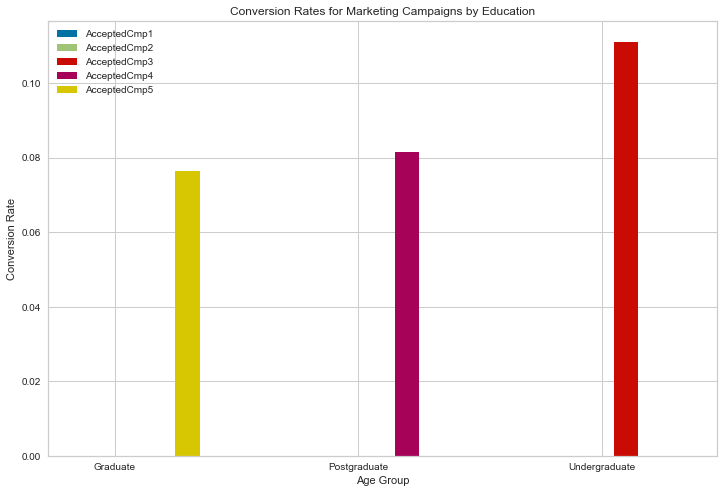

The best campaign for Graduate  is AcceptedCmp5 with a conversion rate of 7.63%
The best campaign for Postgraduate  is AcceptedCmp4 with a conversion rate of 8.14%
The best campaign for Undergraduate  is AcceptedCmp3 with a conversion rate of 11.11%


In [190]:
import pandas as pd
import matplotlib.pyplot as plt



# group the data by age group and calculate the conversion rate for each campaign
age_groups = df.groupby('Education')
conversion_rates = {}
fig, ax = plt.subplots(figsize=(12, 8))


for age_group, group_df in age_groups:
    for i in range(1, 6):
        campaign = 'AcceptedCmp' + str(i)
        conversion_rate = group_df[campaign].sum() / len(group_df)
        if age_group not in conversion_rates:
            conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}
        else:
            if conversion_rate > conversion_rates[age_group]['conversion_rate']:
                conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}

# plot the conversion rates for each campaign by age group as a grouped bar chart
bar_width = 0.1
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
x = [i + bar_width for i in range(len(age_groups))]

for i, campaign in enumerate(campaigns):
    campaign_conversion_rates = []
    for age_group in age_groups.groups.keys():
        campaign_conversion_rate = conversion_rates[age_group]['conversion_rate'] if conversion_rates[age_group]['campaign'] == campaign else 0
        campaign_conversion_rates.append(campaign_conversion_rate)
    plt.bar([x_val + i * bar_width for x_val in x], campaign_conversion_rates, bar_width, label=campaign)

plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Marketing Campaigns by Education')
plt.xticks([i + 2 * bar_width for i in range(len(age_groups))], age_groups.groups.keys())
plt.legend()
plt.show()



# print the best campaign for each age group
for age_group, values in conversion_rates.items():
    print(f"The best campaign for {age_group}  is {values['campaign']} with a conversion rate of {values['conversion_rate']:.2%}")




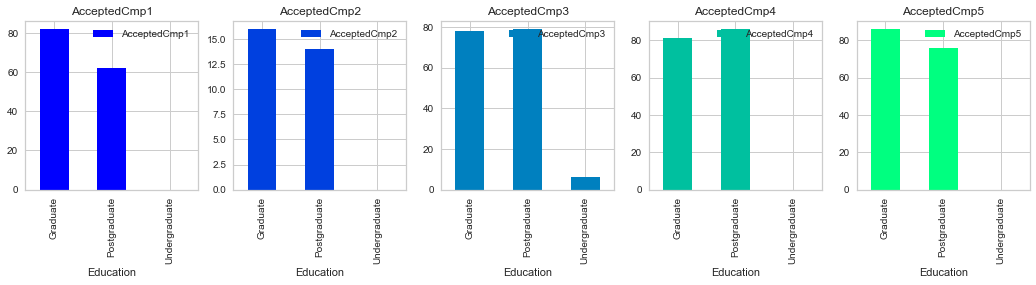

In [191]:
cmp_age=df.groupby('Education')['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', ].sum()
cmp_age.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);

All compaigns are most accepted by Graduates except for Compaign 4 which is most accepted by Post Graduates

In [192]:
# campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
# df1 = pd.melt(df, 
#              id_vars='ID', 
#              value_vars=campaign_cols,
#              var_name='Campaign #')

# accepted_cmp_df = df1[df1['value']==1]
# income_df = df[['ID','Income']]

# cmp_v_income = accepted_cmp_df.merge(income_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')

# plt.figure(figsize=(15,7))
# sns.boxplot(x='Campaign #', y='Income', data=cmp_v_income)
# plt.title("Income Boxplots for the Customers Who Accepted Each Campaign", 
#           fontdict={'fontsize':15,'fontweight':'bold'})
# plt.show()

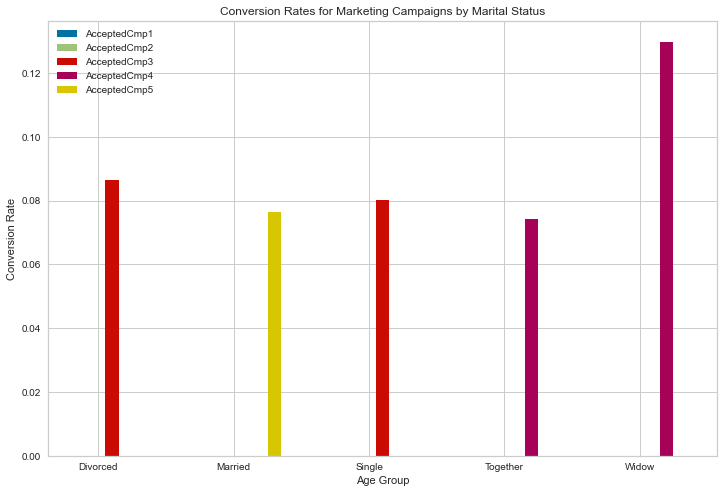

The best campaign for Divorced age group is AcceptedCmp3 with a conversion rate of 8.66%
The best campaign for Married age group is AcceptedCmp5 with a conversion rate of 7.64%
The best campaign for Single age group is AcceptedCmp3 with a conversion rate of 8.02%
The best campaign for Together age group is AcceptedCmp4 with a conversion rate of 7.43%
The best campaign for Widow age group is AcceptedCmp4 with a conversion rate of 12.99%


In [193]:
import pandas as pd
import matplotlib.pyplot as plt



# group the data by age group and calculate the conversion rate for each campaign
age_groups = df.groupby('Marital_Status')
conversion_rates = {}
fig, ax = plt.subplots(figsize=(12, 8))


for age_group, group_df in age_groups:
    for i in range(1, 6):
        campaign = 'AcceptedCmp' + str(i)
        conversion_rate = group_df[campaign].sum() / len(group_df)
        if age_group not in conversion_rates:
            conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}
        else:
            if conversion_rate > conversion_rates[age_group]['conversion_rate']:
                conversion_rates[age_group] = {'campaign': campaign, 'conversion_rate': conversion_rate}

# plot the conversion rates for each campaign by age group as a grouped bar chart
bar_width = 0.1
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
x = [i + bar_width for i in range(len(age_groups))]

for i, campaign in enumerate(campaigns):
    campaign_conversion_rates = []
    for age_group in age_groups.groups.keys():
        campaign_conversion_rate = conversion_rates[age_group]['conversion_rate'] if conversion_rates[age_group]['campaign'] == campaign else 0
        campaign_conversion_rates.append(campaign_conversion_rate)
    plt.bar([x_val + i * bar_width for x_val in x], campaign_conversion_rates, bar_width, label=campaign)

plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Marketing Campaigns by Marital Status')
plt.xticks([i + 2 * bar_width for i in range(len(age_groups))], age_groups.groups.keys())
plt.legend()
plt.show()



# print the best campaign for each age group
for age_group, values in conversion_rates.items():
    print(f"The best campaign for {age_group} age group is {values['campaign']} with a conversion rate of {values['conversion_rate']:.2%}")




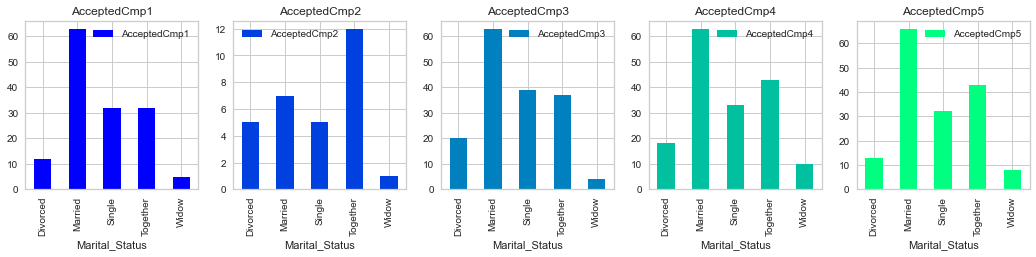

In [194]:
cmp_age=df.groupby('Marital_Status')['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', ].sum()
cmp_age.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);

In [195]:
# product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
# campaign_df = df.melt(id_vars='ID',
#                         value_vars=campaign_cols, 
#                         var_name='Campaign #', 
#                         value_name='Accepted')
# product_df = df[['ID', 'MntWines', 'MntFruits',
#                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
# #compaigns accepted are collected in dataframe
# cmp_acc_df = campaign_df[campaign_df['Accepted'] == 1]

# cmp_v_prod = cmp_acc_df.merge(product_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')
# cmp_v_prod

# final_cmp_prod = cmp_v_prod.melt(id_vars=['ID', 'Campaign #'],
#                                  value_vars=product_cols,
#                                  var_name='Product',
#                                  value_name='Amount')

# meat_wine = final_cmp_prod[final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]
# all_other_prod = final_cmp_prod[~final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]

# ########################

# fig, axes = plt.subplots(2,1,figsize=(15,15))

# sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=meat_wine, 
#             ax=axes[0])
# sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=all_other_prod, 
#             palette=['tab:green','tab:red', 'tab:purple','tab:brown'],
#             ax=axes[1])
# axes[0].legend(bbox_to_anchor=(1,1))
# axes[1].legend(bbox_to_anchor=(1,1))

# plt.show()

## Summary of Behavioural Segmentation

### According to the analysis, the degree of success of different marketing campaigns varies based on the customers income, age group, level of education and marital status. For instance, customers with greater incomes are more inclined to accept advertising and the most successful campaigns vary based on the demographics of the target audience. Customers who are younger and more educated favor some campaigns whereas middle-aged customers with varying degrees of education favor others. Additionally, marital status matters. Divorced and single customers respond well to some advertising whereas married and widowed customers respond better to others. These variations emphasize the significance of customizing marketing initiatives to particular customers because their preferences, interests, and lifestyles may affect how they react to various campaigns. This can be used to improve marketing tactics and better target customers based on their individual traits in real-world circumstances.


## Inferential Statistics

In [196]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Mnt,Total_num_purchase,AOV,Age,Total_Campaigns_Accepted,Ratio of wines,Ratio of food,Ratio of gold
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52244.116674,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.149307,0.008941,605.743406,14.870809,inf,54.098346,0.447027,0.458648,0.421261,0.120091
std,3245.118591,11.701917,25040.597444,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.356471,0.094152,601.840466,7.676593,NaN,11.701917,0.890964,0.228502,0.194139,0.108916
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.533333,27.000000,0.000000,0.000000,0.027523,0.000000
25%,2829.000000,1959.000000,35544.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,8.000000,9.714286,46.000000,0.000000,0.289803,0.263311,0.038095
50%,5455.000000,1970.000000,51400.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,15.000000,23.461538,53.000000,0.000000,0.457822,0.428571,0.085714
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.000000,21.000000,45.533333,64.000000,1.000000,0.639344,0.571286,0.169753
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,44.000000,inf,83.000000,5.000000,0.963303,0.998844,0.894150


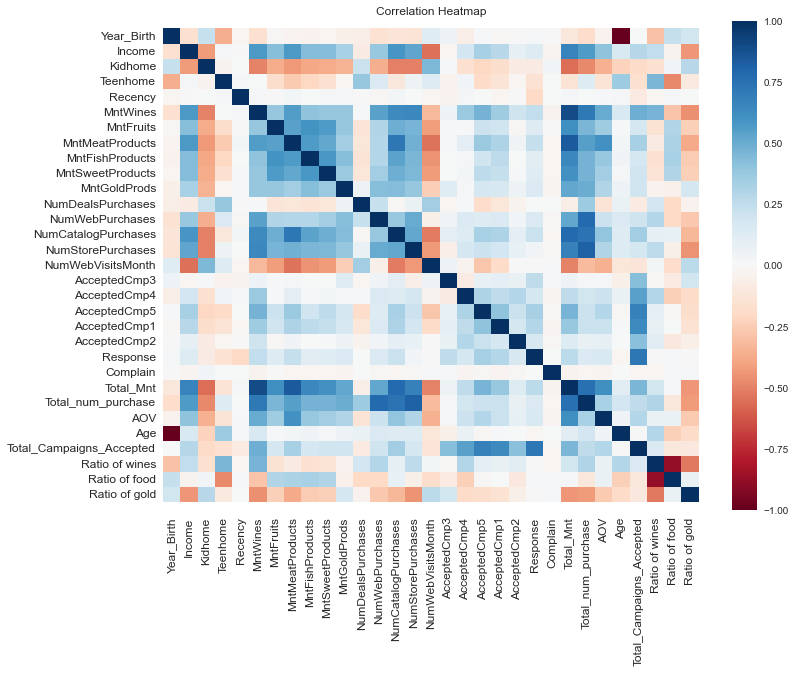

In [197]:
# select columns to plot
df_to_plot = df.drop(columns=['ID',])

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

We can use a heatmap to see the correlations between each variable. When it gets bluer, it means they are positively correlated, and when it gets redder, they are negatively correlated.

Patterns:

1. High Income People

tend to spend more and purchase more.

tend to has few number of purchases made with a discount

2. People having kids at home

tend to spend less and purchase less.

tend to has high number of purchases made with a discount

3. People who purchased with high average order volumne

tend to buy more wines and meat products

tend to make high number of purchases made using a catalog

tend to  visit less the company's website.

Tend to buy less discounted deals

### Is there a significant relationship between the number of marketing campaigns accepted by a customer and their total purchase amount?

"Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend

Alternate hypothesis: There is a significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend."

In [198]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
# df = pd.read_csv("dataset.csv")

# Calculate the correlation coefficient and p-value
corr, p_value = pearsonr(df["Total_Campaigns_Accepted"], df["Total_Mnt"])

# Define the significance level
alpha = 0.05

print("Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend.")
print("Alternate hypothesis: There is a significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend.")
print("")

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant relationship between the number of marketing campaigns accepted and the total purchase amount.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is no significant relationship between the number of marketing campaigns accepted and the total purchase amount.")


Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend.
Alternate hypothesis: There is a significant relationship between the number of marketing campaigns accepted by a customer and their Total Amount Spend.

We reject the null hypothesis.
There is a significant relationship between the number of marketing campaigns accepted and the total purchase amount.


### Is there a significant relationship between the number of marketing campaigns accepted by a customer and website Purchasing?


"Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth."

"Alternate hypothesis: There is significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth."

In [199]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table of the two variables
cont_table = pd.crosstab(df['NumWebVisitsMonth'], df['Total_Campaigns_Accepted'])



# Perform the chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

alpha = 0.05

print("Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.")
print("Alternate hypothesis: There is a significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.")
print("")

print(f"Chi-square statistic: {chi2_stat}")
print(f"p-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{ex}")
print("")

if p_val < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is no significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.")



Null hypothesis: There is no significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.
Alternate hypothesis: There is a significant relationship between the number of marketing campaigns accepted by a customer and their NumWebVisitsMonth.

Chi-square statistic: 151.13269021253598
p-value: 4.622566178689498e-07
Degrees of freedom: 75
Expected frequencies:
[[8.01028163e+00 1.81448368e+00 6.98256594e-01 2.50782298e-01
  1.77022798e-01 4.91729996e-02]
 [1.10687528e+02 2.50728654e+01 9.64863657e+00 3.46535539e+00
  2.44613321e+00 6.79481448e-01]
 [1.47097899e+02 3.33205186e+01 1.28225302e+01 4.60527492e+00
  3.25078230e+00 9.02995083e-01]
 [1.49282521e+02 3.38153777e+01 1.30129638e+01 4.67367009e+00
  3.29906124e+00 9.16405901e-01]
 [1.58021010e+02 3.57948145e+01 1.37746983e+01 4.94725078e+00
  3.49217702e+00 9.70049173e-01]
 [2.03898078e+02 4.61868574e+01 1.77738042e+01 6.38354940e+00
  4.50603487e+00 1.25167635e+00]
 [2.47590523

###  Is there is a significant relationship between a customer's Marital Status and their Acceptance to marketing campaigns."


"Null hypothesis : There is no significant difference in acceptance rate of campaigns between customers with Marital_Status."

"Alternate hypothesis rejected: There is a significant difference in acceptance rate of campaigns between customers with Marital_Status."

In [200]:
# create a contingency table of education and campaign acceptance
cont_table = pd.crosstab(index=df['Marital_Status'], columns=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])

# perform chi-square test of independence
stat, p, dof, expected = chi2_contingency(cont_table)

# set significance level
alpha = 0.05

# print results
print("Contingency Table:\n", cont_table)
print("Test Statistic:", stat)
print("p-value:", p)
if p < alpha:
    print("Null hypothesis rejected: There is a significant difference in acceptance rate of campaigns between customers with Marital_Status.")
else:
    print("Null hypothesis accepted: There is no significant difference in acceptance rate of campaigns between customers with different Marital_Status.")


Contingency Table:
 col_0             0    1   2   3  4
Marital_Status                     
Divorced        185   34   4   6  2
Married         682  124  38  18  2
Single          386   70  22   5  3
Together        464   83  16  12  4
Widow            58   13   3   3  0
Test Statistic: 13.431894472229116
p-value: 0.640955633203203
Null hypothesis accepted: There is no significant difference in acceptance rate of campaigns between customers with different Marital_Status.


 ### Is there a significant relationship between the last  marketing campaign accepted by a customer and their Income?

 
 The null hypothesis is that there is no significant relationship between a customer's income and their response to last marketing campaigns. The alternate hypothesis is that there is a significant relationship between a customer's income and their response to last marketing campaigns.

In [201]:

# Create a contingency table of income and response
cont_table = pd.crosstab(df['Income'], df['Response'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values: \n", expected)

# Determine if the null hypothesis is accepted or rejected
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
    print("there is a significant relationship between a customer's income and their response to last marketing campaigns.")
else:
    print("Accept the null hypothesis")
    print("there is a no significant relationship between a customer's income and their response to last marketing campaigns.")

Chi-square value: 2110.045986128112
P-value: 0.01480952002840701
Degrees of freedom: 1971
Expected values: 
 [[0.85069289 0.14930711]
 [0.85069289 0.14930711]
 [0.85069289 0.14930711]
 ...
 [0.85069289 0.14930711]
 [0.85069289 0.14930711]
 [0.85069289 0.14930711]]
Reject the null hypothesis
there is a significant relationship between a customer's income and their response to last marketing campaigns.


In [202]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_num_purchase,AOV,Age,Total_Campaigns_Accepted,age_group,Ratio of wines,Ratio of food,Ratio of gold
0,8996,1957,Postgraduate,Married,51400,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,603,29,20.793103,66,0,63-70,0.381426,0.530680,0.087894
1,1994,1983,Graduate,Married,51400,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,19,4,4.750000,40,0,39-46,0.263158,0.684211,0.052632
2,3769,1972,Postgraduate,Together,51400,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,5,8.400000,51,0,47-54,0.595238,0.333333,0.071429
3,5255,1986,Graduate,Single,51400,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,637,27,23.592593,37,0,31-38,0.007849,0.423862,0.568289
4,8268,1961,Postgraduate,Married,51400,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,404,17,23.764706,62,0,55-62,0.871287,0.091584,0.037129


### What factors are significantly related to the number of Store purchases?

Text(0, 0.5, 'Quantity')

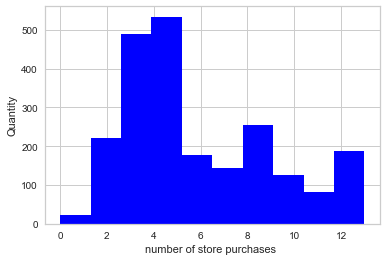

In [203]:
plt.hist(df.NumStorePurchases,color = 'blue')
plt.xlabel('number of store purchases ')
plt.ylabel('Quantity')

<AxesSubplot:>

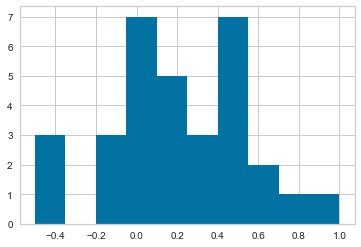

In [204]:
df.corr().NumStorePurchases.hist()

In [205]:
df.corr().loc[(df.corr().NumStorePurchases<-0.3) | (df.corr().NumStorePurchases>0.4)]['NumStorePurchases']

Income                 0.526630
Kidhome               -0.500387
MntWines               0.642433
MntFruits              0.463168
MntMeatProducts        0.480110
MntFishProducts        0.460099
MntSweetProducts       0.448801
NumWebPurchases        0.502277
NumCatalogPurchases    0.518884
NumStorePurchases      1.000000
NumWebVisitsMonth     -0.429886
Total_Mnt              0.675573
Total_num_purchase     0.820089
Ratio of gold         -0.446035
Name: NumStorePurchases, dtype: float64

#### Insights : if you have more income, you are going to have more number of purchases made directly in stores So, if you have more kidhome, you are going to have a less number of purchases made directly in stores. It somehow makes sense, as it is difficult to go to the stores with kids.


<AxesSubplot:xlabel='NumStorePurchases', ylabel='MntWines'>

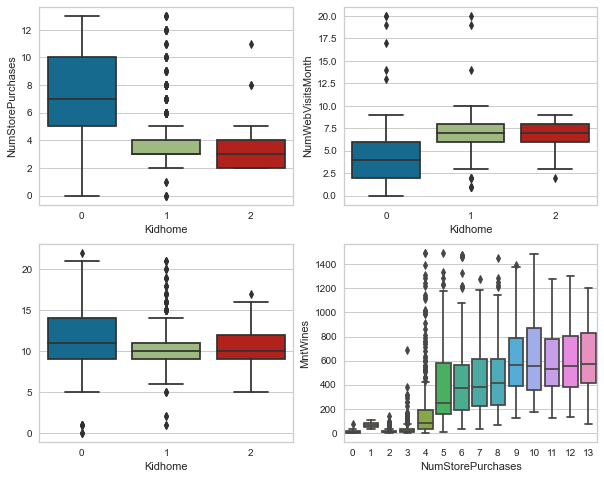

In [206]:
fig, axs=plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='Kidhome', y='NumStorePurchases', data=df, ax=axs[0,0])
sns.boxplot(x='Kidhome', y='NumWebVisitsMonth', data=df, ax=axs[0,1])
sns.boxplot(x=df['Kidhome'], y=df['NumStorePurchases']+df['NumWebVisitsMonth'], ax=axs[1,0])
sns.boxplot(y=df['MntWines'], x=df['NumStorePurchases'], ax=axs[1,1])

#### As expected, families with no kids prefer to go to the store for purchasing and they are not want to shop online. On ther other hand, families with one or two kids shopping online more often than no kids families. In general, the total buying from store and web for all families are almost the same (figure 3) Another intersting thing is the number of wines buying and the amount of store purchasing. The figure 4 illustrates that families whom buying more wines, visiting store more often:)

In [207]:
### Does people who spent an above average amount on gold in the last 2 years would have more in store purchases?

# Purchases = df.loc[:,'NumDealsPurchases':'NumWebVisitsMonth'] 
# Products = df.loc[:,'MntWines':'MntGoldProds'] 
# Gold_avg = np.mean(Products['MntGoldProds'])

# mask = Products['MntGoldProds']>=Gold_avg

# Above_gold = Products[mask].index
# Below_gold = Products[~mask].index

# fig,ax = plt.subplots(1,2)
# fig.set_size_inches(15,5)
# sns.histplot(ax=ax[0], data=Purchases[mask], x='NumStorePurchases', kde=True, label='Purchase Gold Above Avg.', color='indigo',element='step')
# sns.histplot(ax=ax[0], data=Purchases[~mask], x='NumStorePurchases', kde=True, label='Below', color='darkorange', element='step')

# temp = Purchases.join(mask)  
# temp['MntGoldProds'] = temp['MntGoldProds'].replace({True:'Gold above avg.', False:'Gold below avg.'})
# sns.boxplot(ax=ax[1], data=temp, y='NumStorePurchases', x='MntGoldProds', palette={'Gold above avg.':'indigo','Gold below avg.':'darkorange'})

# ax[0].legend()
# plt.show()

#### From the histogram and boxplot below, we can conclude that people who spent an above-average amount on gold have more in-store purchases.

### Saving dataframe to seperate variable for simplicity

In [208]:
EDA_Stat_df = df.copy()

### DATA PROCESSING FOR MACHINE LEARNING MODELS

In [209]:
ml_df=df.copy()


In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer


# ml_df=ml_df.drop('Education',axis=1)
# convert Education column from string to float
ml_df['Education'] = ml_df['Education'].replace([ 'Undergraduate','Graduate', 'Postgraduate'], [1, 2, 3])

# convert Marital_Status column from string to float
ml_df['Marital_Status'] = ml_df['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow'], [1, 2, 3, 4, 5])

# ml_df=ml_df.drop('Marital_Status',axis=1)
ml_df['Income'] = ml_df['Income'].replace([ 666666], [66666])

ml_df = ml_df.drop(columns=['Dt_Customer', 'Country','Ratio of wines','Ratio of food','Ratio of gold','AOV','age_group'])





In [211]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ml_df)

df_final_scaled = pd.DataFrame(scaled, columns=ml_df.columns)
df_final_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Mnt,Total_num_purchase,Age,Total_Campaigns_Accepted
0,1.049587,-1.017296,1.015484,0.497630,-0.02691,2.889690,0.906417,-1.558039,-0.219898,0.396140,0.111179,0.210094,0.240553,0.173536,5.005572,1.048218,-0.226664,0.678612,1.517337,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.418942,-0.09498,-0.004559,1.840966,1.017296,-0.501847
1,-1.108598,1.205059,-0.823899,0.497630,-0.02691,1.032151,-0.930227,-1.316239,-0.888548,-0.535684,-0.713250,-0.686886,-0.607218,-0.825644,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.418942,-0.09498,-0.975133,-1.416415,-1.205059,-0.501847
2,-0.561500,0.264832,1.015484,-0.457086,-0.02691,1.032151,-0.930227,-1.108983,-0.829112,-0.636422,-0.682223,-0.686886,-0.655663,-0.787214,-0.686563,-1.110957,-0.910939,-0.859749,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.418942,-0.09498,-0.936909,-1.286119,-0.264832,-0.501847
3,-0.103479,1.461484,-0.823899,-1.411802,-0.02691,1.032151,-0.930227,-1.039897,-0.888548,-0.636422,-0.726547,-0.631969,5.714733,6.110971,-1.204030,8.245467,-0.910939,-1.782765,-1.780485,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.418942,-0.09498,0.051947,1.580376,-1.461484,-0.501847
4,0.825200,-0.675395,1.015484,0.497630,-0.02691,-0.825388,0.906417,-0.901726,0.142659,-0.661606,-0.620169,-0.503829,-0.655663,-0.556634,0.348371,0.688356,-0.568802,0.370940,0.280654,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.418942,-0.09498,-0.335286,0.277423,0.675395,-0.501847


In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# Transform df for the next step which visualizes the data
obj_feat = ml_df.select_dtypes(exclude=[np.number]).columns
le = LabelEncoder()

for obj in obj_feat[:-1]:
    trans = le.fit_transform(df[obj])
    df[obj] = trans

## Clustering algorithms 
### Kmeans
#### We want to cluster dataset, but we don't know how many clusters there. To solve this problem we use an Elbow method

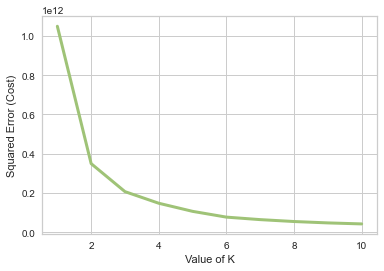

In [213]:
cost =[]
for i in range(1, 11):
    KM = KMeans(init = "k-means++", n_clusters = i, max_iter = 1000)
    KM.fit(ml_df)
    # calculates squared error for the clustered points
    cost.append(KM.inertia_)    

# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot


In [214]:
# Set number of cluster to 3
model = KMeans(n_clusters=3, random_state=123)
yhat = model.fit_predict(df_final_scaled)

ml_df['Cluster'] = yhat

Clearly the elbow is forming at K = 3 So the optimal value will be 3 for performing K-Means. Now, we can create a model. Let's apply k-means on our dataset, and take a look at cluster labels.

### Ratio of customers in each Cluster

Let's have a look on the customers quantity distribution after clustering :


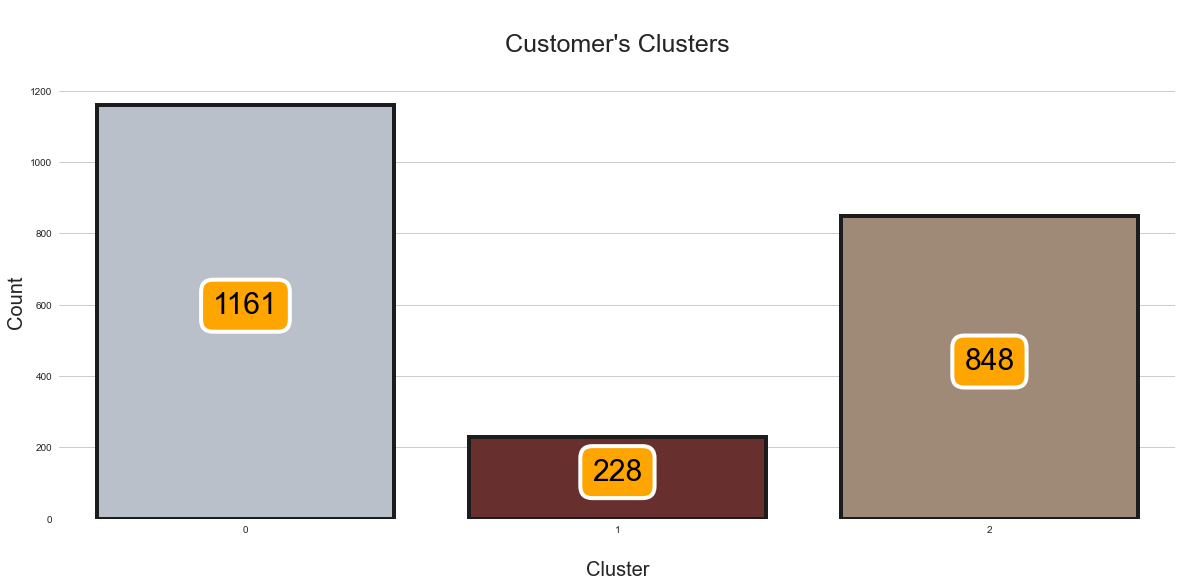

In [215]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=ml_df["Cluster"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

In [216]:
# sns.countplot(data=ml_df, x='Cluster', palette='Spectral')

### Dsitribution of Income and age with respect to Cluster

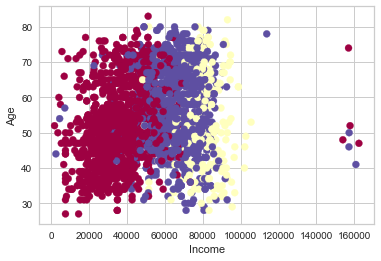

In [217]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# visualize the clusters
plt.scatter(ml_df['Income'], ml_df['Age'], c=ml_df['Cluster'],cmap='Spectral')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


In [220]:
### Clusters of Customer with respect to their Income and Total Spending


# fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
# fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)

# sns.scatterplot(data=ml_df, x='Income', y='Mnt_total_purchases', hue='Cluster', palette='Spectral', ax=axd[0])
# sns.violinplot(data=ml_df, x='Cluster', y='Mnt_total_purchases', palette='Spectral', ax=axd[1])
# sns.violinplot(data=ml_df, x='Cluster', y='Income', palette='Spectral', ax=axd[2])

### Lets dig deeper to get more insights from Clusters

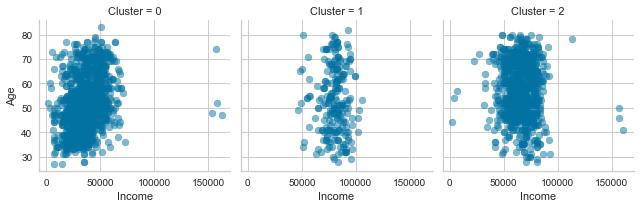

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(data=ml_df, col='Cluster',palette='Spectral')
g.map(plt.scatter, 'Income', 'Age', alpha=0.5)
plt.show()


Text(0.6, 3400, '0: UnderGraduate\n1: graduate\n2: Postgraduate')

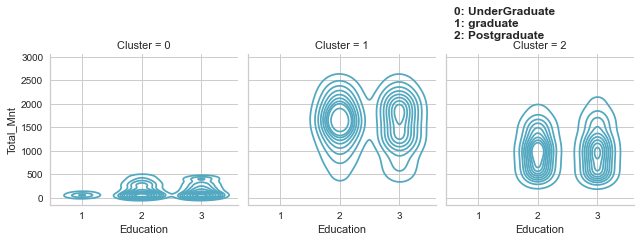

In [222]:
g = sns.FacetGrid(data=ml_df, col='Cluster')
g.map(sns.kdeplot, 'Education', 'Total_Mnt', color='#52a8c0')

plt.text(0.6,3400, '0: UnderGraduate\n1: graduate\n2: Postgraduate', weight='bold', fontsize=12)

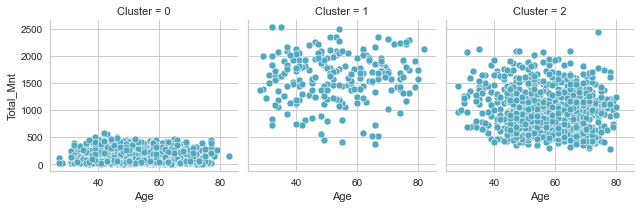

In [223]:
g = sns.FacetGrid(data=ml_df, col='Cluster')
g.map(sns.scatterplot, 'Age', 'Total_Mnt', color='#52a8c0')



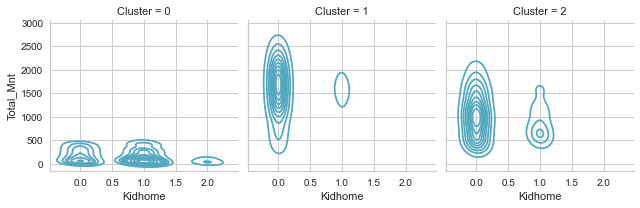

In [224]:
g = sns.FacetGrid(data=ml_df, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'Total_Mnt', color='#52a8c0')



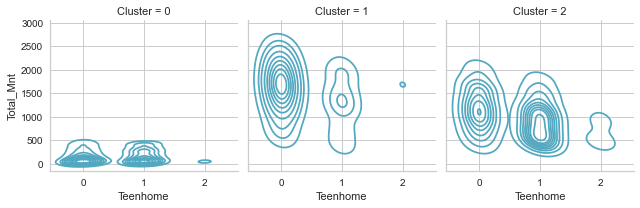

In [225]:
g = sns.FacetGrid(data=ml_df, col='Cluster')
g.map(sns.kdeplot, 'Teenhome', 'Total_Mnt', color='#52a8c0')



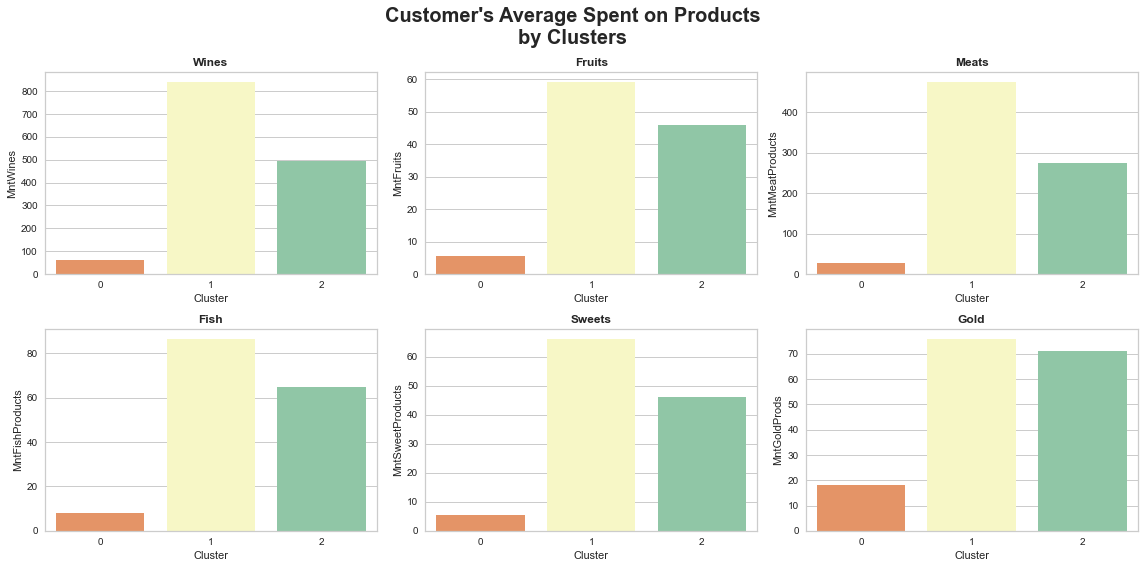

In [226]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=ml_df, x='Cluster', y='MntWines', palette='Spectral', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='MntFruits', palette='Spectral', ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='MntMeatProducts', palette='Spectral', ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='MntFishProducts', palette='Spectral', ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='MntSweetProducts', palette='Spectral', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='MntGoldProds', palette='Spectral', ci=None, ax=axes[5])
axes[5].set_title('Gold', weight='bold')

plt.tight_layout()

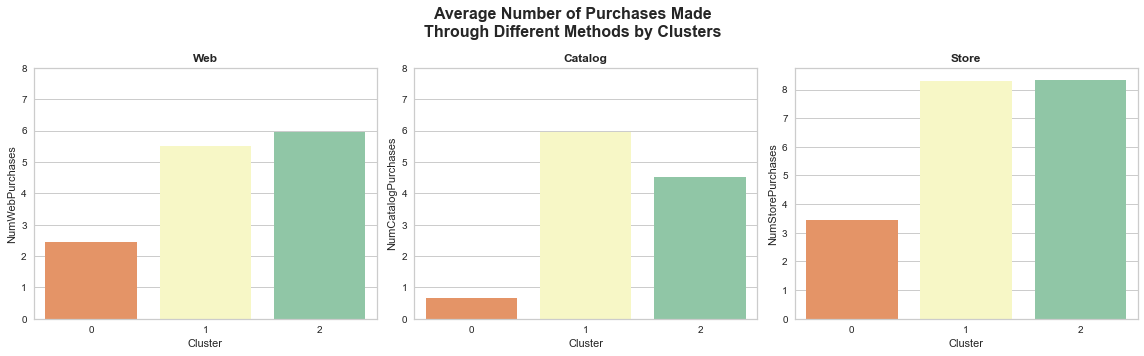

In [227]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=16)
axes = axes.flatten()

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=ml_df, x='Cluster', y='NumWebPurchases', palette='Spectral', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='NumCatalogPurchases', palette='Spectral', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y='NumStorePurchases', palette='Spectral', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

plt.tight_layout()

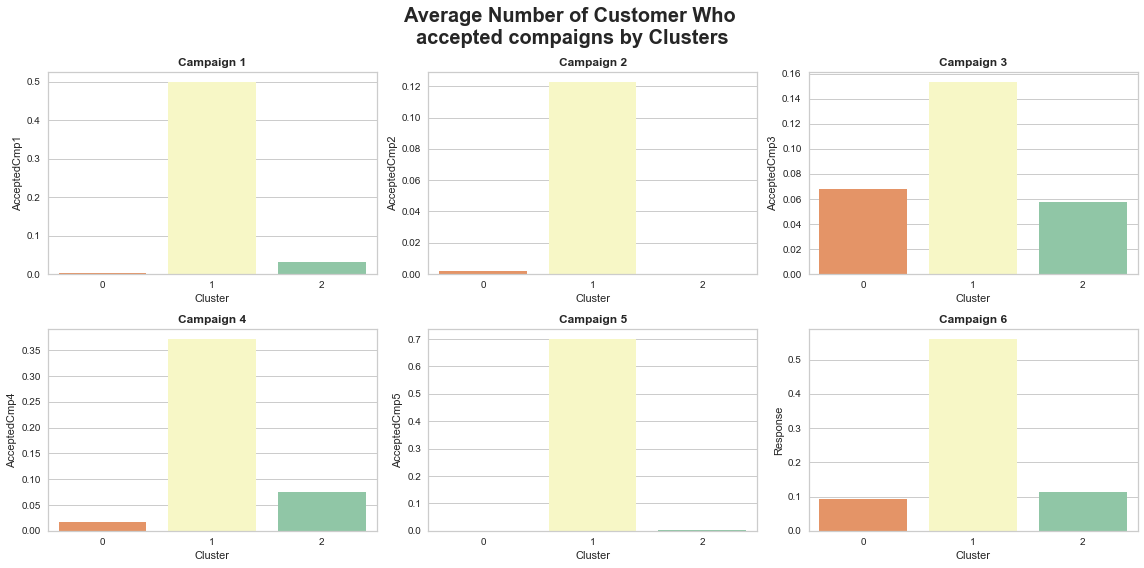

In [228]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Average Number of Customer Who \naccepted compaigns by Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=ml_df, x='Cluster', y=ml_df['AcceptedCmp1'], palette='Spectral', ci=None, ax=axes[0])
axes[0].set_title('Campaign 1', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y=ml_df['AcceptedCmp2'], palette='Spectral', ci=None, ax=axes[1])
axes[1].set_title('Campaign 2', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y=ml_df['AcceptedCmp3'], palette='Spectral', ci=None, ax=axes[2])
axes[2].set_title('Campaign 3', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y=ml_df['AcceptedCmp4'], palette='Spectral', ci=None, ax=axes[3])
axes[3].set_title('Campaign 4', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y=ml_df['AcceptedCmp5'], palette='Spectral', ci=None, ax=axes[4])
axes[4].set_title('Campaign 5', weight='bold')
sns.barplot(data=ml_df, x='Cluster', y=ml_df['Response'], palette='Spectral', ci=None, ax=axes[5])
axes[5].set_title('Campaign 6', weight='bold')

plt.tight_layout()

After extracting insights and information from clustering result and performing some analyses

Here's the conclusion of each cluster:


### From those graphs, we can deduce that:
## Cluster 0:

#####                  Low spending & Low income
#####                   All Age Level
#####                  All Education Level     
#####                  Have 1 or 2 Kids  
#####                  Accepted Compaign 3 and 6












## Cluster 1:
#####                  Average spending & Average Income 
#####                  Graduates & Post-Graduates
#####                  Have no or 1 kids  
#####                  didnt accept compaign 5 at all









## Cluster 2:
#####                  High spending & High income
#####                  Graduates & Post-Graduates
#####                  No kids 
#####                 Span All Ages 
#####                 Highly Participant in all compaigns




In [230]:

# # Creating a new dataset 
# clusters_products = ml_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Cluster']]    # Select variables

# clusters_products1 = clusters_products.groupby(['Cluster'])
# clusters_products2 = clusters_products1.agg({'MntWines':'sum', 'MntFruits':'sum', 'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum'})

# clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1':'Products'})   # Oposite as pivoting

# clusters_products3['group'] = clusters_products3['Cluster']
# clusters_products3['group'] = clusters_products3['group'].astype(str)

# # # Rename values
# # clusters_products3['group'] = clusters_products3['group'].str.replace('0', 'Good Customers')
# # clusters_products3['group'] = clusters_products3['group'].str.replace('1', 'Elite Customers')
# # clusters_products3['group'] = clusters_products3['group'].str.replace('2', 'Economical Customers')
# # clusters_products3['group'] = clusters_products3['group'].str.replace('3', 'Cheap Customers')

# products = clusters_products3.copy()
# products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# # Visualization
# fig = px.bar(products, x='group', y='ratio', color='Products',
#              labels={
#                      "ratio": "Ratio",
#                      "group": "Consumer's type"
#                      },
#              color_discrete_map={
#                      'Gold': '#FFD700',
#                      'Fish': '#87CEEB',
#                      'Wines': '#b11226',
#                      'Meat': '#f08080',
#                      'Sweet': '#FF69B4',
#                      'Fruits': 'lightgreen'},
#                 title="Products Distribution by Clusters")

# fig.layout.yaxis.tickformat = ',.0%'

# fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)

# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# fig.update_layout(
#     {'plot_bgcolor': 'gray',
#     'paper_bgcolor': 'gray'
#     },
#     font=dict(
#         family="verdana",
#         size=21,
#         color="white"
#     ),
#     width=680,
#     height=800,
#     title_font_color="#FFC300",
#     yaxis_title=None,
#     xaxis_title=None
# )

# fig.show()

## Machine and Deep Learning

In [128]:
pm_df=df_m.copy()


In [129]:
pm_df=pm_df.drop('AOV',axis=1)
pm_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_num_purchase,Age,Total_Campaigns_Accepted
0,8996,1957,PhD,Married,51400,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,603,29,66,0
1,1994,1983,Graduation,Married,51400,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,19,4,40,0
2,3769,1972,PhD,Together,51400,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,5,51,0
3,5255,1986,Graduation,Single,51400,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,637,27,37,0
4,8268,1961,PhD,Married,51400,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,404,17,62,0


In [130]:
from datetime import datetime
pm_df['Years_as_Cust'] = pd.DatetimeIndex(pm_df['Dt_Customer']).year
pm_df['Years_as_Cust'] = 2023 - pm_df['Years_as_Cust']
print(pm_df['Years_as_Cust'].describe())

count    2237.000000
mean        9.972284
std         0.684704
min         9.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        11.000000
Name: Years_as_Cust, dtype: float64


In [131]:
# Save the dataset into new DataFrame called cpdata_cap and continue with cap & floor the outliers
cpdata_cap = pm_df.copy()
features = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Total_Mnt',
       'Total_num_purchase']

In [132]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [133]:
iqr_capping(cpdata_cap, features, 1.5)
cpdata_cap.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_num_purchase,Age,Total_Campaigns_Accepted,Years_as_Cust
0,8996,1957.0,PhD,Married,51400.0,2,1,2012-11-19,4.0,230.0,42.0,192.0,49.0,37.0,53.0,6.0,7.0,2.0,8.0,9.0,0,0,0,0,0,0,0,GER,603.0,29.0,66.0,0,11
1,1994,1983.0,Graduation,Married,51400.0,1,0,2013-11-15,11.0,5.0,5.0,6.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,0,US,19.0,4.0,40.0,0,10
2,3769,1972.0,PhD,Together,51400.0,1,0,2014-03-02,17.0,25.0,1.0,13.0,0.0,0.0,3.0,1.0,1.0,0.0,3.0,7.0,0,0,0,0,0,0,0,AUS,42.0,5.0,51.0,0,9
3,5255,1986.0,Graduation,Single,51400.0,1,0,2013-02-20,19.0,5.0,1.0,3.0,3.0,81.0,126.5,0.0,12.0,0.0,0.0,1.0,0,0,0,0,0,0,0,AUS,637.0,27.0,37.0,0,10
4,8268,1961.0,PhD,Married,51400.0,0,1,2013-07-11,23.0,352.0,0.0,27.0,10.0,0.0,15.0,3.0,6.0,1.0,7.0,6.0,0,0,0,0,0,0,0,CA,404.0,17.0,62.0,0,10


In [134]:
#Apply Standard Scaler to reduce skewness
#Standardize skewed variables
from sklearn.preprocessing import StandardScaler
columns_scaled = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Age', 'Total_Mnt',
       'Total_num_purchase', 'Years_as_Cust']

scalar = StandardScaler()
cpdata_scaled = pd.DataFrame(scalar.fit_transform(pm_df[columns_scaled]), columns=columns_scaled, index=pm_df.index)




#Adding scaled columns back to dataset
cpdata_scaled = pd.concat([cpdata_scaled, cpdata_cap.drop(axis=1, columns=columns_scaled)],axis=1)


### Data Transformation
Before applying any model we need to transform categorical variables into numerical variables using pandas

In [136]:

# Encoding categorical variables using pandas
cat_columns = cpdata_scaled.select_dtypes(exclude = np.number)
# print("Number of unique values per categorical feature:\n", cat_columns.nunique())
dummies_cat = pd.get_dummies(cat_columns)

# Add to cptdat_scaled Dataframe and changed the name as mktdata_trf
cpdata_trf = pd.concat([cpdata_scaled,dummies_cat], axis=1)
cpdata_trf = cpdata_trf.drop(columns=cat_columns.columns)
cpdata_trf = cpdata_trf.drop(['ID'], axis=1)
cpdata_trf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year_Birth                2237 non-null   float64
 1   Income                    2237 non-null   float64
 2   Recency                   2237 non-null   float64
 3   MntWines                  2237 non-null   float64
 4   MntFruits                 2237 non-null   float64
 5   MntMeatProducts           2237 non-null   float64
 6   MntFishProducts           2237 non-null   float64
 7   MntSweetProducts          2237 non-null   float64
 8   MntGoldProds              2237 non-null   float64
 9   NumDealsPurchases         2237 non-null   float64
 10  NumWebPurchases           2237 non-null   float64
 11  NumCatalogPurchases       2237 non-null   float64
 12  NumStorePurchases         2237 non-null   float64
 13  NumWebVisitsMonth         2237 non-null   float64
 14  Age     

In [137]:
#Apply PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(cpdata_trf)

pcaSummary = pd.DataFrame({'std_deviation': np.sqrt(pca.explained_variance_),
              'prop_of_variance' : pca.explained_variance_ratio_,
              'cum_prop_var': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_tps = pcaSummary.transpose()
pcaSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcaSummary_tps.columns) + 1)]

pcacomponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_tps.columns,
                                index=cpdata_trf.columns)


In [138]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]


silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]


kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))


Silhoutte score of our model is 0.2063177353537866


In [139]:
#adding cluster labels column into dataset
pm_df['cluster_id'] = kmeans.labels_
cpdata_trf['cluster_id'] = kmeans.labels_
cpdata_trf = pd.get_dummies(cpdata_trf, columns=['cluster_id'])

### Based on the demographic of each group, I try to label them as their characteristics
Cluster_id = 0: Low income & less spending = L&L

Cluster_id = 1: Medium income & medium speding = M&M

Cluster_id = 2: High income & High spending = H&H

In [140]:
#change label name of cluster_id
cpdata_E = pm_df.assign(cluster_cat=pd.cut(pm_df['cluster_id'], 
                               bins=[-1, 0.5, 1.5, 2.5], 
                               labels=['L&L', 'M&M', 'H&H']))
cpdata_E.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_num_purchase,Age,Total_Campaigns_Accepted,Years_as_Cust,cluster_id,cluster_cat
0,8996,1957,PhD,Married,51400,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,603,29,66,0,11,0,L&L
1,1994,1983,Graduation,Married,51400,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,19,4,40,0,10,1,M&M
2,3769,1972,PhD,Together,51400,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,5,51,0,9,1,M&M
3,5255,1986,Graduation,Single,51400,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,637,27,37,0,10,2,H&H
4,8268,1961,PhD,Married,51400,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,404,17,62,0,10,0,L&L


In [141]:
# Partition and transform data before modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
r_state = 3


# isolate X and y variables, and perform train-test split
X = cpdata_trf.drop(['Response'], axis=1)
y = cpdata_trf['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

###  Applying Modeling to predict Campaign Response

### Logistic regression

In [142]:
# # Logistic regression model
# lored = LogisticRegression(C=1e9,solver='liblinear')
# lored.fit(X_train, y_train)

# # predictions
# y_pred_lored = lored.predict(X_test)

# # evaluate model using RMSE
# print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lored)))
# print("Median value of target variable: ", y.median())


# # import the metrics class
# from sklearn import metrics
# cm = metrics.confusion_matrix(y_test, y_pred_lored)





# cls_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# ticks = np.arange(len(cls_names))
# plt.xticks(ticks, cls_names)
# plt.yticks(ticks, cls_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix\n', fontsize = 16)
# plt.ylabel('Actual label',fontsize = 16)
# plt.xlabel('Predicted label',fontsize = 16)


# # Print accuracy, Precision, Recall and F1 Score
# from sklearn.metrics import precision_score, recall_score, f1_score
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lored))
# print("Precision:",metrics.precision_score(y_test, y_pred_lored, average="binary"))
# print("Recall:",metrics.recall_score(y_test, y_pred_lored, average="binary"))
# print("F1 Score:",metrics.f1_score(y_test, y_pred_lored, average="binary"))


In [130]:
# Partition and transform data before modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
r_state = 3

# Create imbalanced data by setting 90% of the responses to 0
cpdata_trf.loc[:, 'Response'] = np.where(np.random.rand(len(cpdata_trf)) < 0.9, 0, cpdata_trf.Response)

# isolate X and y variables, and perform train-test split
X = cpdata_trf.drop(['Response'], axis=1)
y = cpdata_trf['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Logistic regression model
lored = LogisticRegression(C=1e9,solver='liblinear')
lored.fit(X_train, y_train)

# predictions
y_pred_lored = lored.predict(X_test)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lored)))
print("Median value of target variable: ", y.median())
print("Accuracy of the model: ", accuracy_score(y_test, y_pred_lored))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lored))
print("Precision:",metrics.precision_score(y_test, y_pred_lored, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_lored, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lored, average="binary"))


Logistic regression model RMSE:  0.11180339887498948
Median value of target variable:  0.0
Accuracy of the model:  0.9875
Accuracy: 0.9875
Precision: 0.3333333333333333
Recall: 0.16666666666666666
F1 Score: 0.2222222222222222


Text(0.5, 15.0, 'Predicted label')

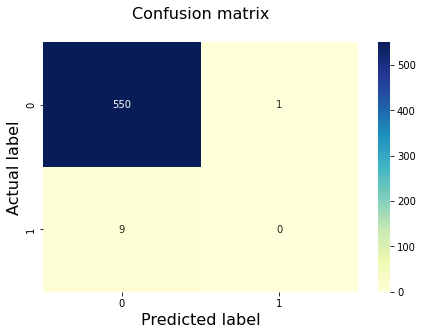

In [112]:
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)




### Decision Tree


Decision Tree model RMSE:  0.1267731382092775
Median value of target variable:  0.0
Accuracy: 0.9839285714285714
Precision: 0.2
Recall: 0.16666666666666666
F1 Score: 0.1818181818181818


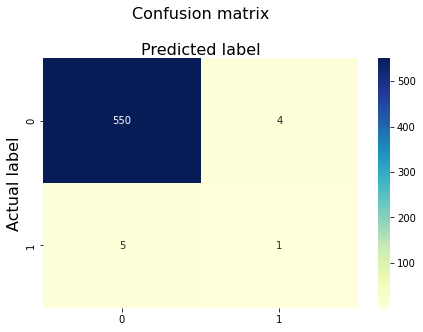

In [131]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_maxtree = clf.predict(X_test)

# evaluate model using RMSE
print("Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_maxtree)))
print("Median value of target variable: ", y.median())



cm = metrics.confusion_matrix(y_test, y_pred_maxtree)



cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_maxtree))


print("Precision:",metrics.precision_score(y_test, y_pred_maxtree, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_maxtree, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_maxtree, average="binary"))


### Neural Network

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
# set Hyper parameters
learning_rate=0.01
no_epochs=100

# Model creation

model = Sequential([
    Flatten(input_shape=(51,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Fit model
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(cpdata_trf),  verbose=2)


y_pred_NN = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



Epoch 1/100
1/1 - 1s - loss: 0.6501 - accuracy: 0.6249 - 817ms/epoch - 817ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6319 - accuracy: 0.6625 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6141 - accuracy: 0.7060 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 0.5969 - accuracy: 0.7436 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.5802 - accuracy: 0.7686 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5639 - accuracy: 0.8068 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5481 - accuracy: 0.8378 - 7ms/epoch - 7ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5328 - accuracy: 0.8640 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5178 - accuracy: 0.8885 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5032 - accuracy: 0.9082 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 0.4891 - accuracy: 0.9237 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.4754 - accuracy: 0.9350 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 0.4619 - accuracy: 0.9398 -

## Now, we will use logistic regression model to predict response from new marketing campaign on the basis of clusters and then we will compare which cluster will accept the new campaigns.

### FInding the significant variables to include in the best model so far which is the logistic Regression model 

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(lored,n_features_to_select=40)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)


X_train_sig = X_train.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False,True,False,True
                              ]
                          ]
X_test_sig = X_test.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False,True,False,True
                              ]
                        ]

[False  True False  True False  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False False  True  True
  True  True  True False  True  True False  True False  True  True  True
  True  True  True]
[ 7  1  4  1  6  1  1  1  1  1  1  1  1  2  5  1  1  1  1  1  1  1  1  1
  1  8  1  1  1  1  1  1 12  9  1  1  1  1  1 11  1  1  3  1 10  1  1  1
  1  1  1]


In [122]:
X_train_sig.head()

,Income,Recency,MntWines,MntMeatProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_num_purchase,Years_as_Cust,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Campaigns_Accepted,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,cluster_id_0,cluster_id_2
1284,0.286314,0.238186,-0.635947,-0.008496,-0.633494,-0.686563,-0.031369,-0.226664,0.678612,-0.956029,0.016833,-1.420324,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1956,-0.431081,1.274470,-0.864773,-0.726547,-0.844859,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-1.416415,0.040487,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1534,-1.146999,0.618157,-0.876661,-0.682223,-0.460559,-0.686563,-1.110957,-0.568802,-1.167421,0.280654,-1.286119,0.040487,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
265,-1.083048,-1.350782,-0.897463,-0.708818,-0.498989,-0.169096,-0.751094,-0.910939,-0.859749,0.692882,-1.025529,0.040487,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1302,-0.544203,0.238186,-0.570568,-0.544818,0.865276,-0.686563,-0.751094,0.799748,-0.859749,-0.956029,-0.504348,0.040487,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Logistic regression model
lored = LogisticRegression(C=1e9, solver='liblinear')
lored.fit(X_train_sig, y_train)

# predictions
y_pred = lored.predict(X_test_sig)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Logistic regression model RMSE:  0.07319250547113999
Median value of target variable:  0.0
Accuracy: 0.9946428571428572


In [124]:
import statsmodels.api as sm
log_reg = sm.GLM(y_train, X_train).fit()
# print(log_reg.summary())


rfe = RFE(lored,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train.values)
# print(rfe.support_)
# print(rfe.ranking_)


X_train_sig = X_train.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False,False,True]]

X_test_sig = X_test.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False,False,True]]


log_reg = sm.Logit(y_train, X_train_sig).fit()

         Current function value: 0.020563
         Iterations: 35


# Analyze with labels of groups

cluster_cat           L&L     M&M         H&H
Response_pred                                
0.0            601.000000  1040.0  398.000000
1.0              5.000000     0.0  193.000000
%Repsonse        0.825083     0.0   32.656514


<AxesSubplot:xlabel='Response_pred'>

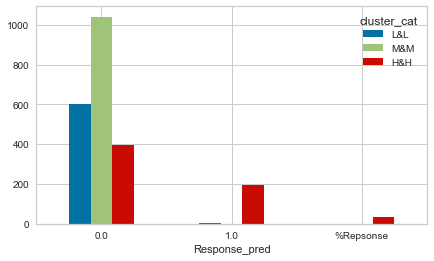

In [125]:
# Create dataframe cpdata_trf_sig to predict target 
cpdata_trf_sig =cpdata_trf.drop(['Response'], axis=1).loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False]]

y_pred_sig = log_reg.predict(cpdata_trf_sig)

# change the y_pred from probability to decrete value 0 and 1
for idx in y_pred_sig.index :
  if y_pred_sig[idx] < 0.5:
    y_pred_sig[idx] = 0
  else:
    y_pred_sig[idx] = 1


cpdata_E['Response_pred'] = y_pred_sig


CrosstabResult = pd.crosstab(index=cpdata_E['Response_pred'],columns=cpdata_E['cluster_cat'])
CrosstabResult.loc['%Repsonse'] = (CrosstabResult.loc[1]/ (CrosstabResult.loc[1]+CrosstabResult.loc[0]))*100
print(CrosstabResult)


CrosstabResult.plot.bar(figsize=(7,4), rot=0)

###  So the H&H group is likely to response to our campaign and the L&L and M&M is the least likely to repsonse

#### Lets see more Insights about compaign prediction on customer's profilining(demographics,behaviours, purchases etc)

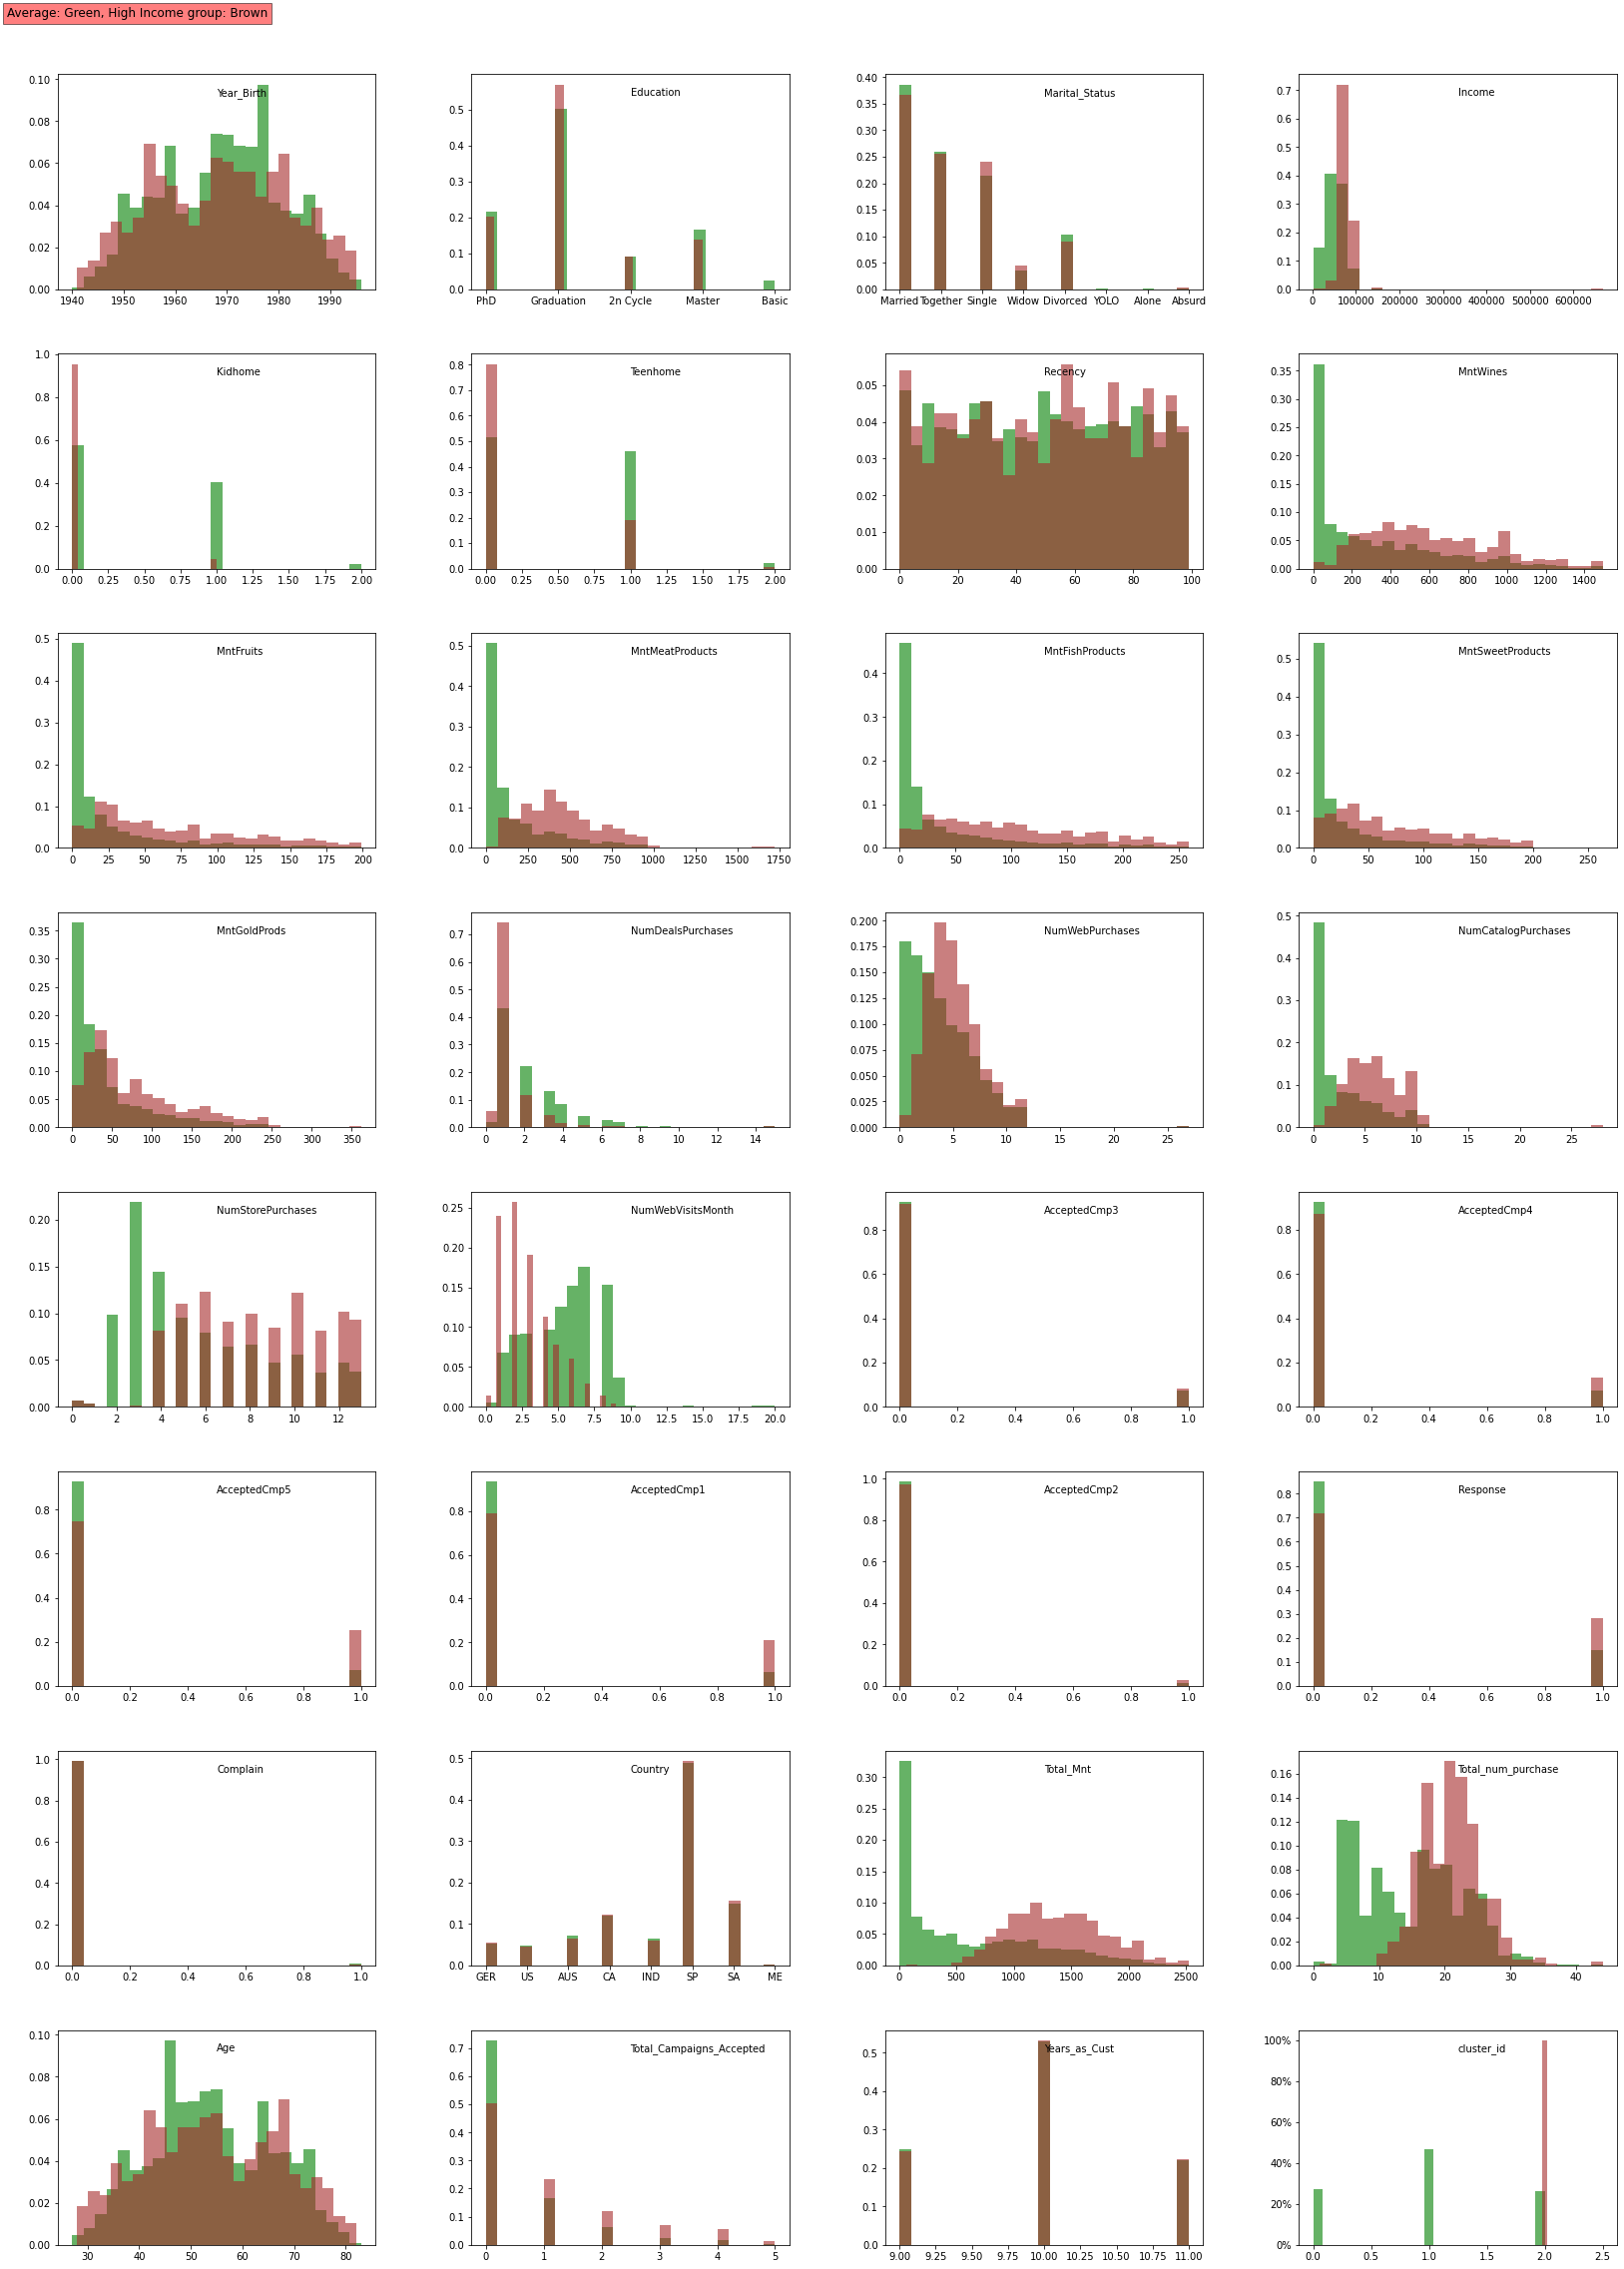

In [136]:
# Create data frame for H&H group who likely to response "Yes" to our next campaign
cpdata_H = pm_df.loc[cpdata_E['cluster_id'] == 2]


plt_a = cpdata_E.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = cpdata_H.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'green',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), alpha=0.6, bins=25, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'brown',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), alpha=0.6, bins=25, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Average: Green, High Income group: Brown',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

### Conclusion and Recommendation
H&H group are most likely to respond to the new campaign based on the prediction, while group L&L is less likely to respond We need to shift our focus to H&H group instead of L&L group

It seems like the higher education the higher rate of responses we should focus more on the higher education group

High Income people with no kid or teen at home will more likely to accept the compaign

Spain should be the best company for new compaigns acceptance

Customers with no complains will accept the compaign

Customers who are with company older than 10 years will accept the compaign as they are loyal.

High Spenders and customer with website purchasing and deals will accept the compaigns.


------------ Our marketing team can use this points to target customers for our next compaigns to grow business--------------